In [74]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from scipy.stats import wilcoxon
from sklearn.linear_model import LinearRegression

In [75]:
# https://www.cryptoarchive.com.au/asset/DOGE --> Doge EUR
folderpath = "../../Data/QMEF/"

df = pd.read_csv(folderpath + 'DOGEUSDT.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']
# Quote Asset Volume verwenden. Volume ist im Verhältnis zu BTC.

df_btc = pd.read_csv(folderpath + 'BTCUSDT.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df_btc.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']
# Quote Asset Volume verwenden. Volume ist im Verhältnis zu BTC.

In [78]:
df_tweets = pd.read_csv("../../Data/QMEF/doge_tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets.drop_duplicates('TweetId', inplace = True)

df_tweets['timestamp'] = df_tweets['UTC'].apply(lambda x: x.astype('int')//10**9)
df_tweets['timestamp'] = df_tweets['timestamp'] - (df_tweets['timestamp'] % 60) #Abrunden auf Minuten

df_tweets = df_tweets[['UTC', 'timestamp', 'Text', 'Favorites', 'Retweets', 'neg', 'neu', 'pos', 'compound']]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
# df_tweets_relevant = df_tweets.loc[(df_tweets['Favorites'] >= 500_000) & (df_tweets['Retweets'] >= 50_000)].copy()

df_tweets['UTC'] = pd.to_datetime(df_tweets['UTC'])
# Zeitdauer von 6 Stunden
time_threshold = timedelta(hours=6)

# Liste für Zeilen, die behalten werden sollen
df_tweets_relevant = []

# Iteriere über jeden Eintrag im DataFrame
for index, row in df_tweets.iterrows():
    utc_time = row['UTC']
    
    # Überprüfe die Differenz zur 'UTC'-Spalte aller anderen Einträge
    time_difference = abs(df_tweets.loc[df_tweets.index != index, 'UTC'] - utc_time)
    
    # Wenn die Differenz größer oder gleich 6 Stunden ist, behalte den Eintrag
    if (time_difference >= time_threshold).all():
        df_tweets_relevant.append(index)

# Filtere den DataFrame nach den ausgewählten Zeilen
df_tweets_relevant = df_tweets.loc[df_tweets_relevant]
df_tweets_relevant.drop([3, 18], inplace=True) # Löschen der Tweets, weil in der Doge-Coin-Zeitreihe hier Preise fehlen.
pd.set_option('display.max_colwidth', None)
print(df_tweets_relevant['Text'])

4                                                                                                                                                                 @dogecoin I just set up some little Doge mining rigs with my kids. It was fun.
5                                                                                                                                                                                                                             @Grimezsz Dogecake
6                                                                                                                                                                                                                              @beeple 420M Doge
7                                                                                                                                                                                      Doge meme shield (legendary item) https://t.co/CeomU9q84c
8     @itsALLrisky Doge appears to b

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.0001166578310119093
T[0; 1] =  4.239183201792826
T[0; 5] =  1.5747751753185093
T[0; 10] =  2.6926451838140664
T[0; 30] =  0.7137333526559749
T[0; 60] =  0.5369900128056214
T[0; 120] =  0.026008854642363053


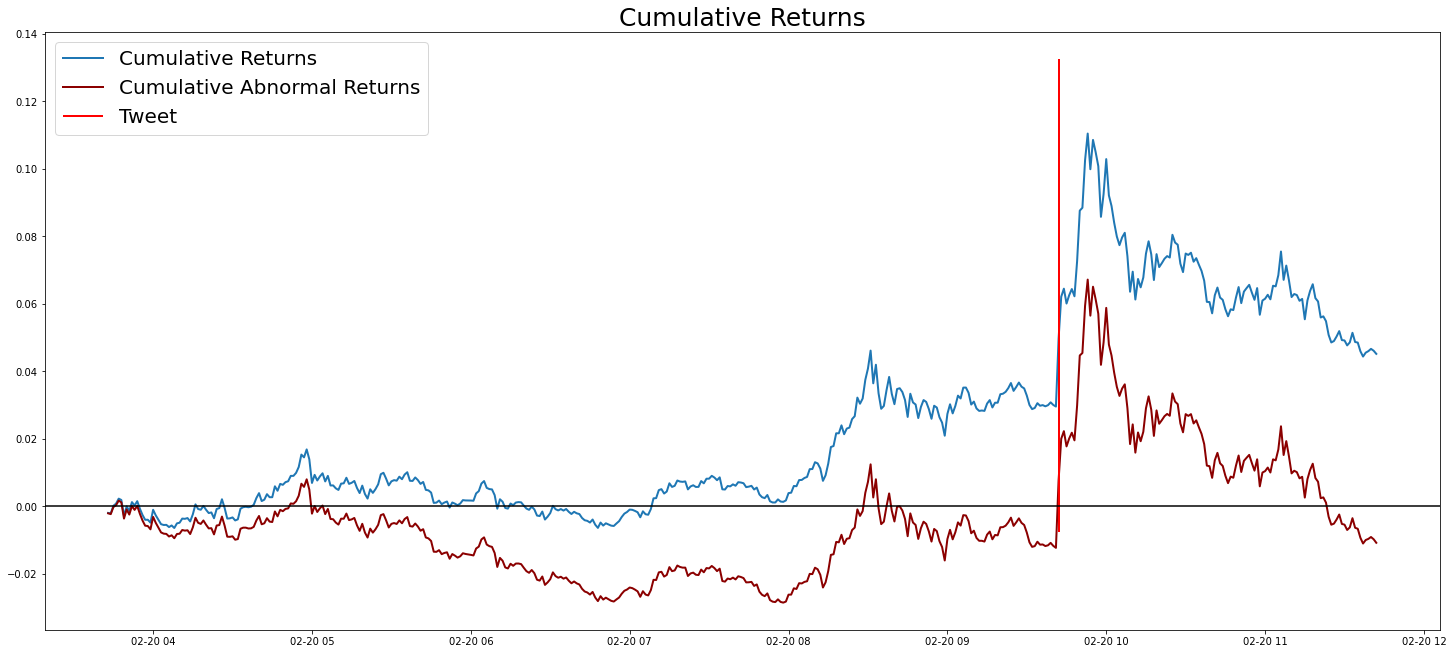

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00011954122636684032
T[0; 1] =  -0.16328146644376756
T[0; 5] =  -1.2711323826031402
T[0; 10] =  -1.112601150300769
T[0; 30] =  -1.285370986835372
T[0; 60] =  -0.7091467927746506
T[0; 120] =  0.3157255846133703


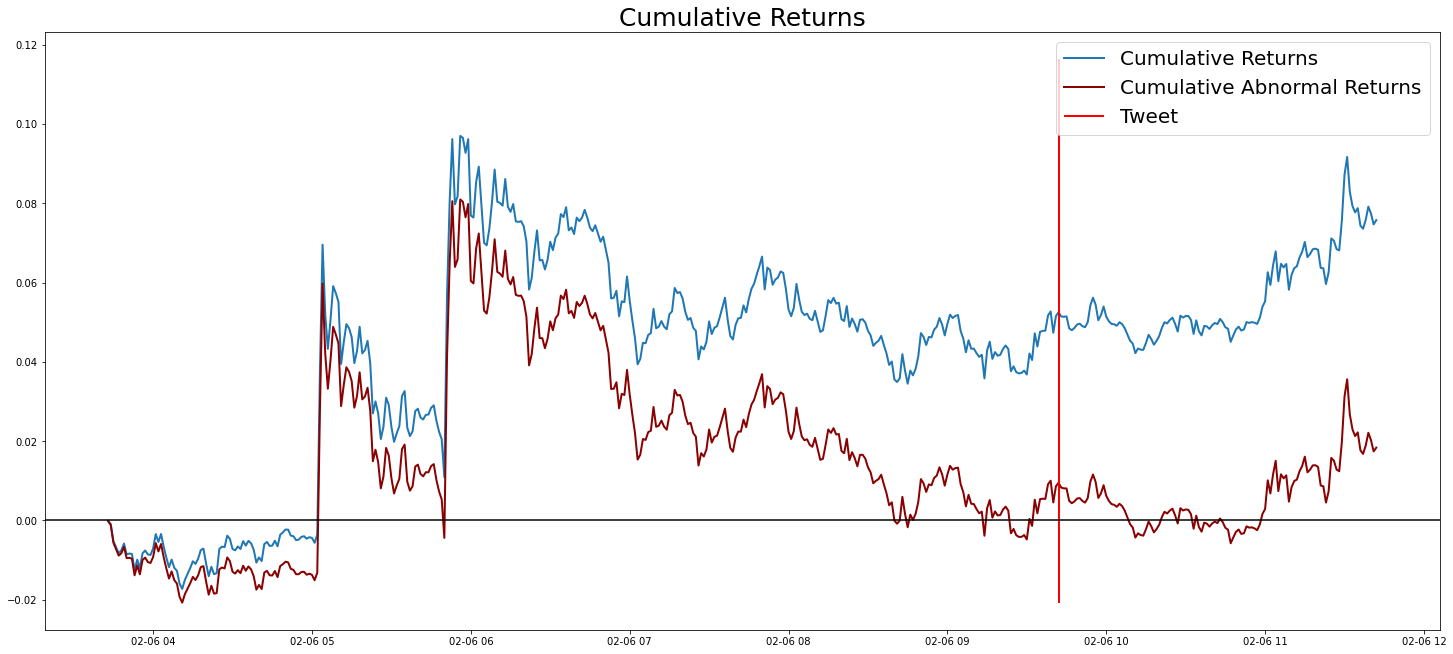

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  5.7995718885262655e-05
T[0; 1] =  1.4188780114235486
T[0; 5] =  1.4813755728600884
T[0; 10] =  0.45768563865361056
T[0; 30] =  0.04662629527319552
T[0; 60] =  -0.11489864064116766
T[0; 120] =  -1.06582919318792


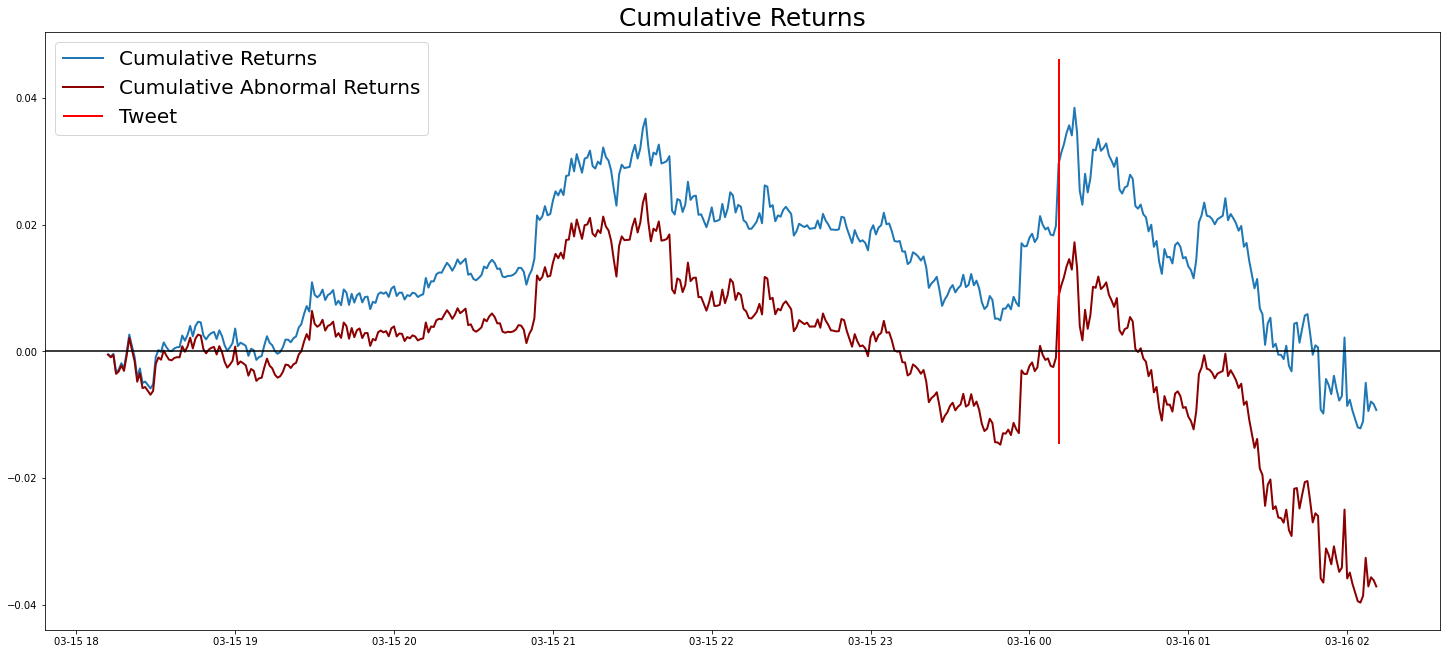

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -5.2747043932395145e-05
T[0; 1] =  3.471426411820988
T[0; 5] =  0.6734820962033435
T[0; 10] =  0.5624173985724984
T[0; 30] =  0.34635942840628403
T[0; 60] =  0.31852174071716244
T[0; 120] =  0.6646279246344333


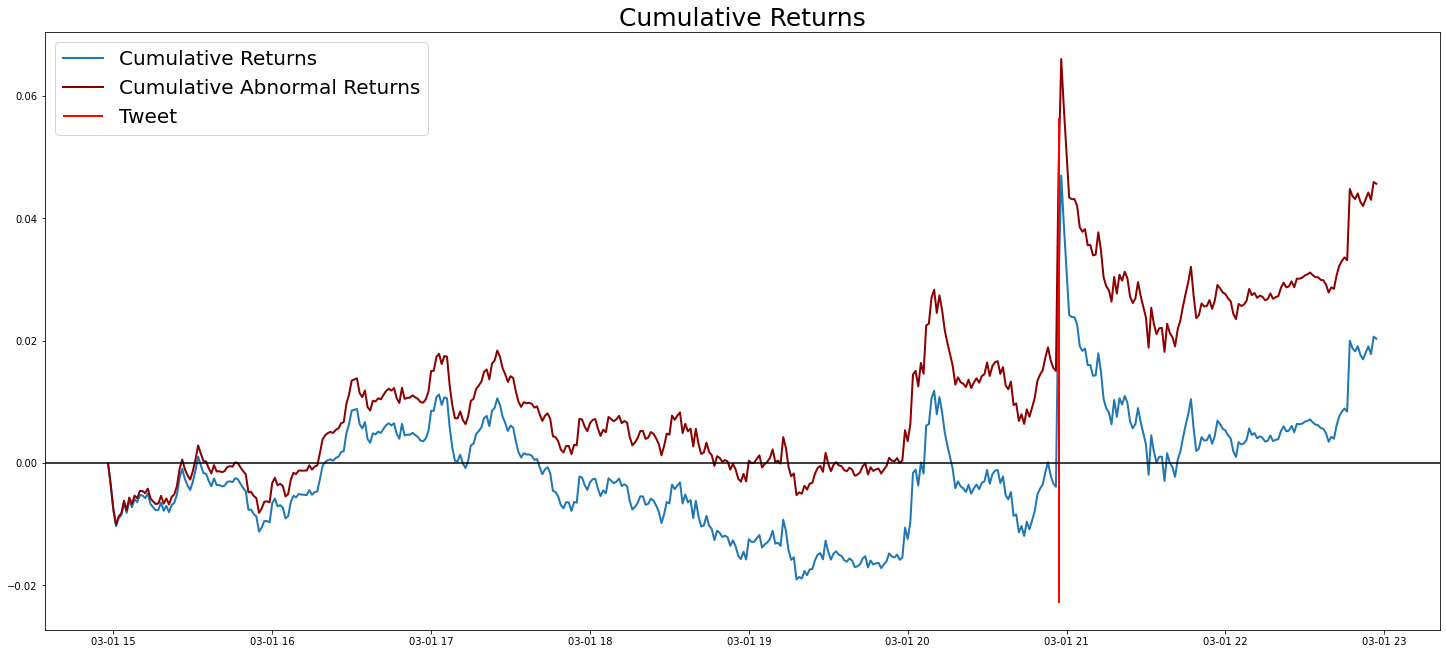

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -0.0004238815129562764
T[0; 1] =  -0.23640227061358837
T[0; 5] =  -0.2141006362264407
T[0; 10] =  -0.4867143689719467
T[0; 30] =  -0.6541440681748888
T[0; 60] =  0.1716399118983704
T[0; 120] =  -0.2102634891077464


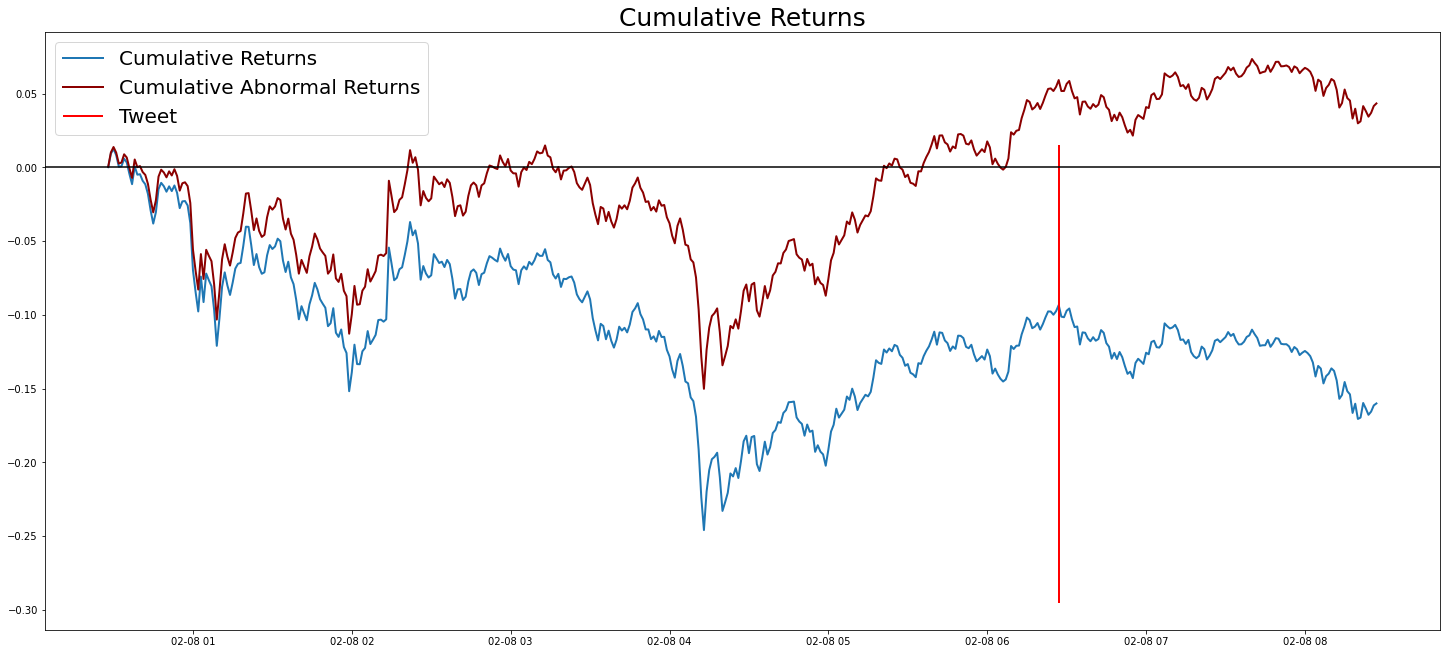

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -6.435561389600386e-05
T[0; 1] =  4.17580273808606
T[0; 5] =  1.462504480269266
T[0; 10] =  1.5420922000109087
T[0; 30] =  0.8478133502814132
T[0; 60] =  0.7335102491624159
T[0; 120] =  0.6442803298185706


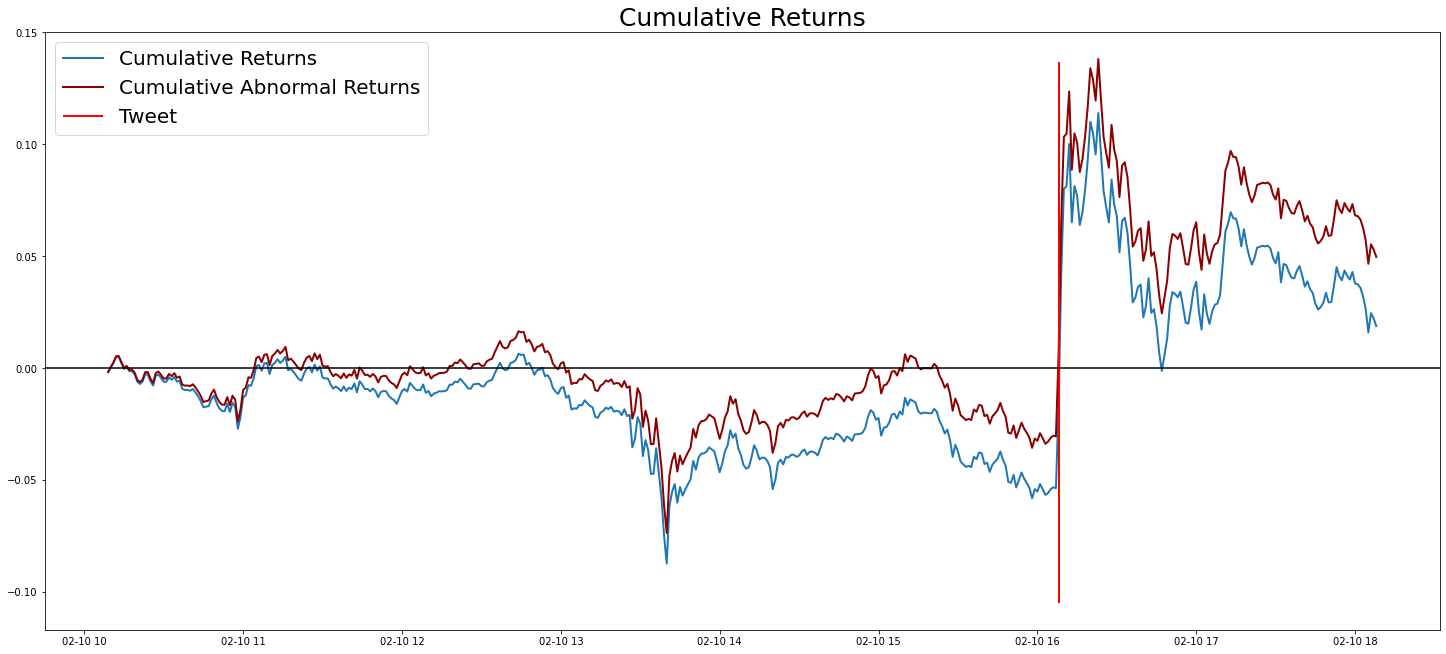

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -7.125517873890502e-05
T[0; 1] =  2.057894214473867
T[0; 5] =  2.3135636062895784
T[0; 10] =  3.3267533243879055
T[0; 30] =  1.3131808463440517
T[0; 60] =  0.9673812016193302
T[0; 120] =  1.0346880213261402


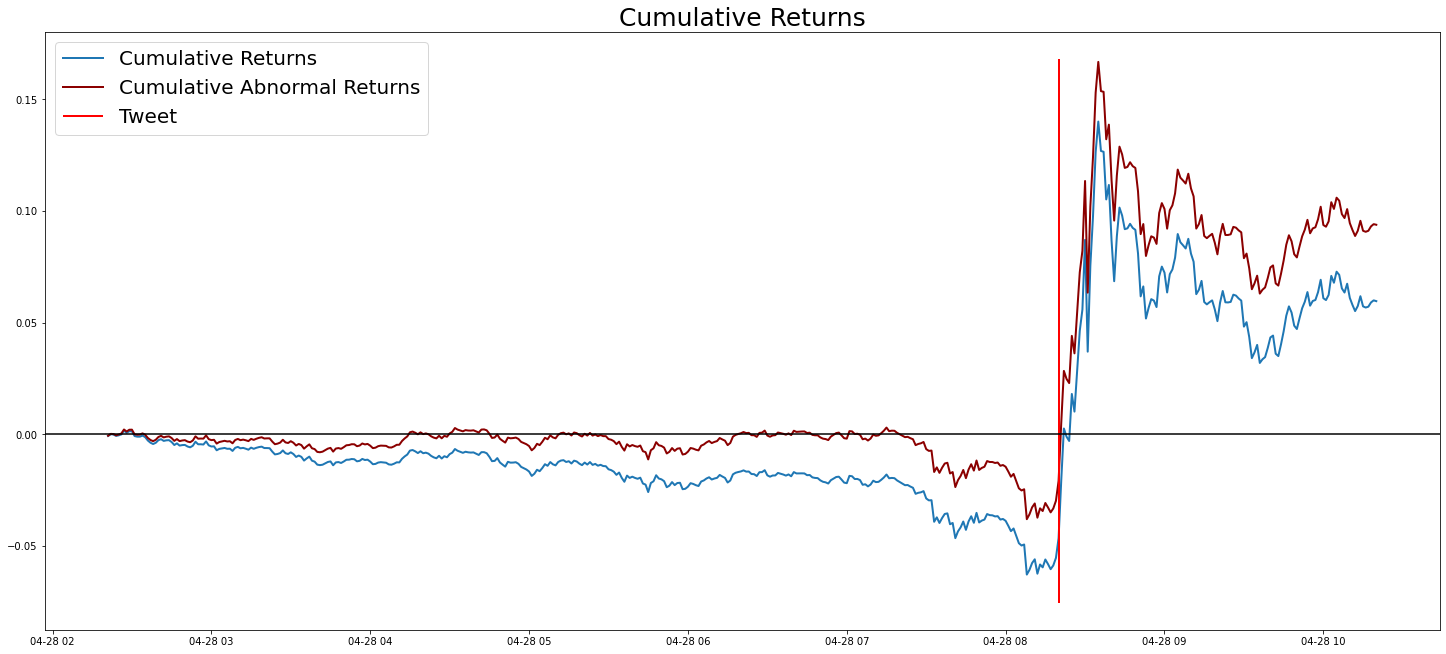

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  1.8498899864579395e-05
T[0; 1] =  -0.742858230226308
T[0; 5] =  0.34769274928255206
T[0; 10] =  0.3434943753487658
T[0; 30] =  0.8439180096923926
T[0; 60] =  0.9135776921293787
T[0; 120] =  0.5134024010491871


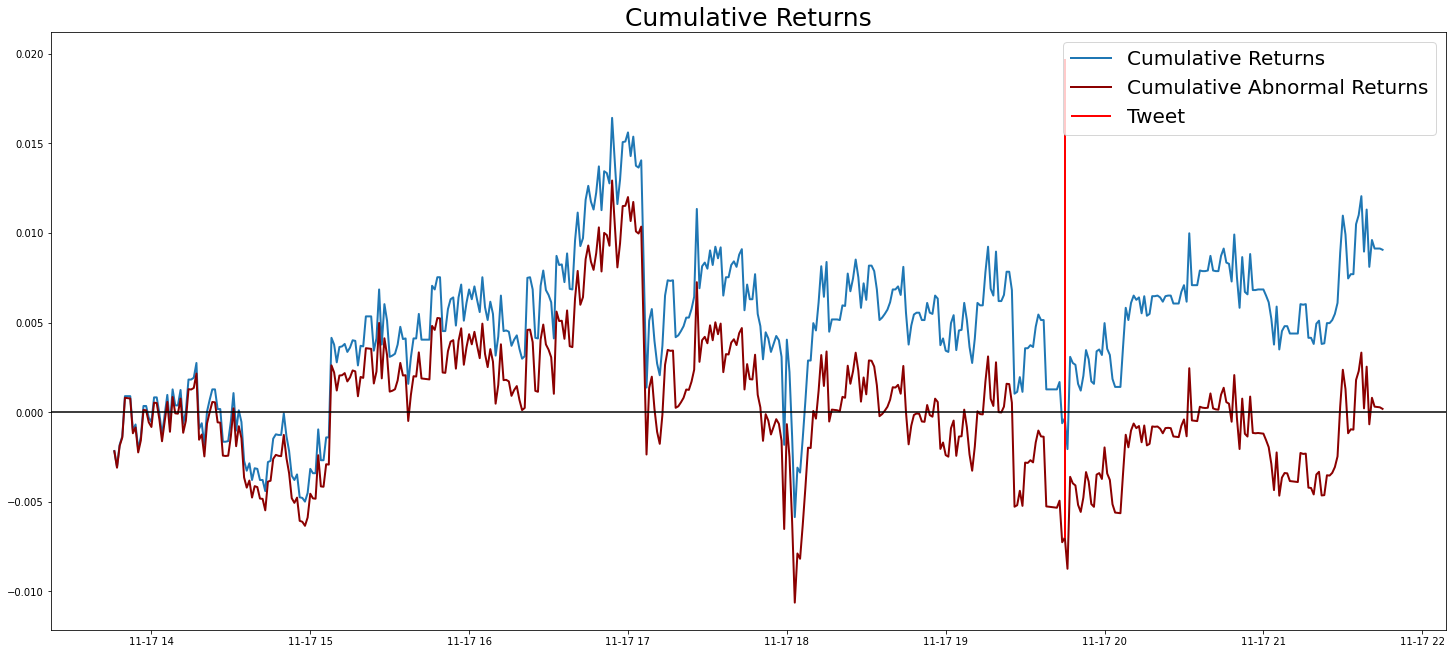

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  9.10511907813602e-05
T[0; 1] =  4.951959138097377
T[0; 5] =  4.39810827453629
T[0; 10] =  2.918633556439251
T[0; 30] =  1.4074052023364345
T[0; 60] =  1.0164040398520136
T[0; 120] =  0.9568517187046711


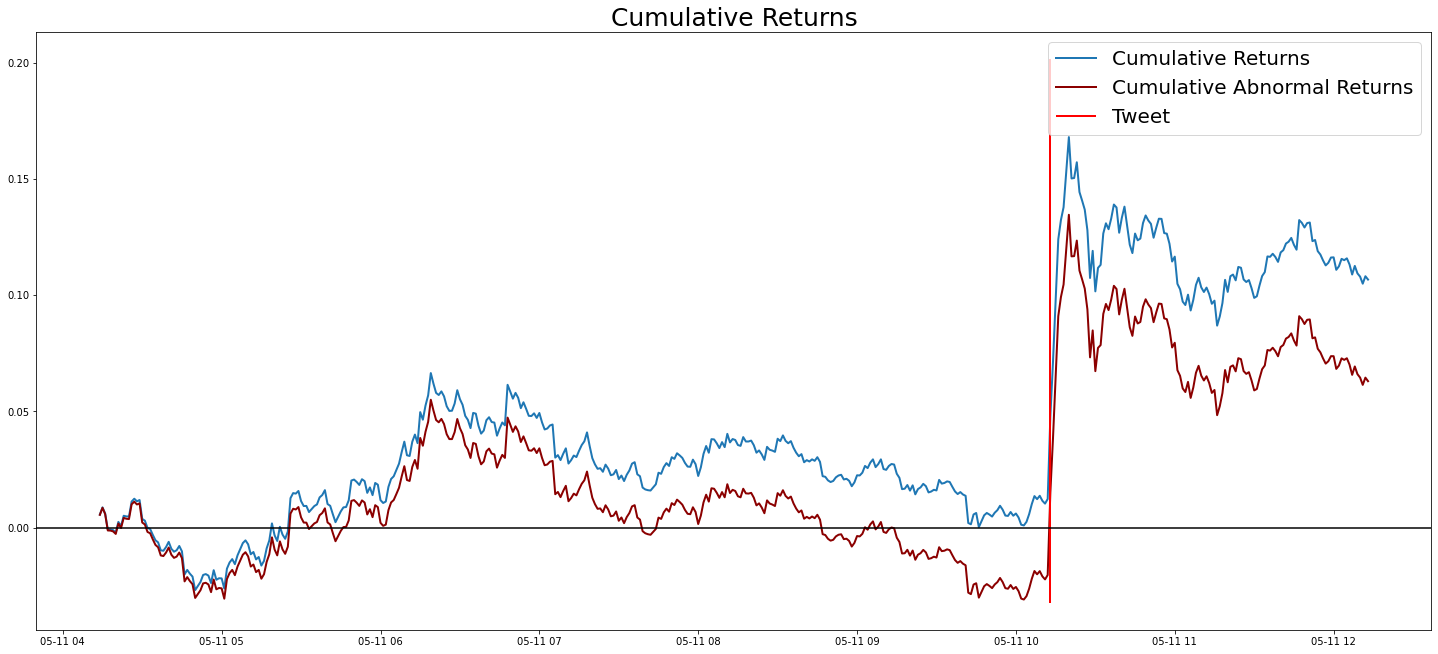

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -8.575581004954297e-05
T[0; 1] =  0.7647750857778668
T[0; 5] =  0.022201764625641413
T[0; 10] =  -0.16977535540298577
T[0; 30] =  -0.6460620992045436
T[0; 60] =  0.30451047639646006
T[0; 120] =  0.5881454626765883


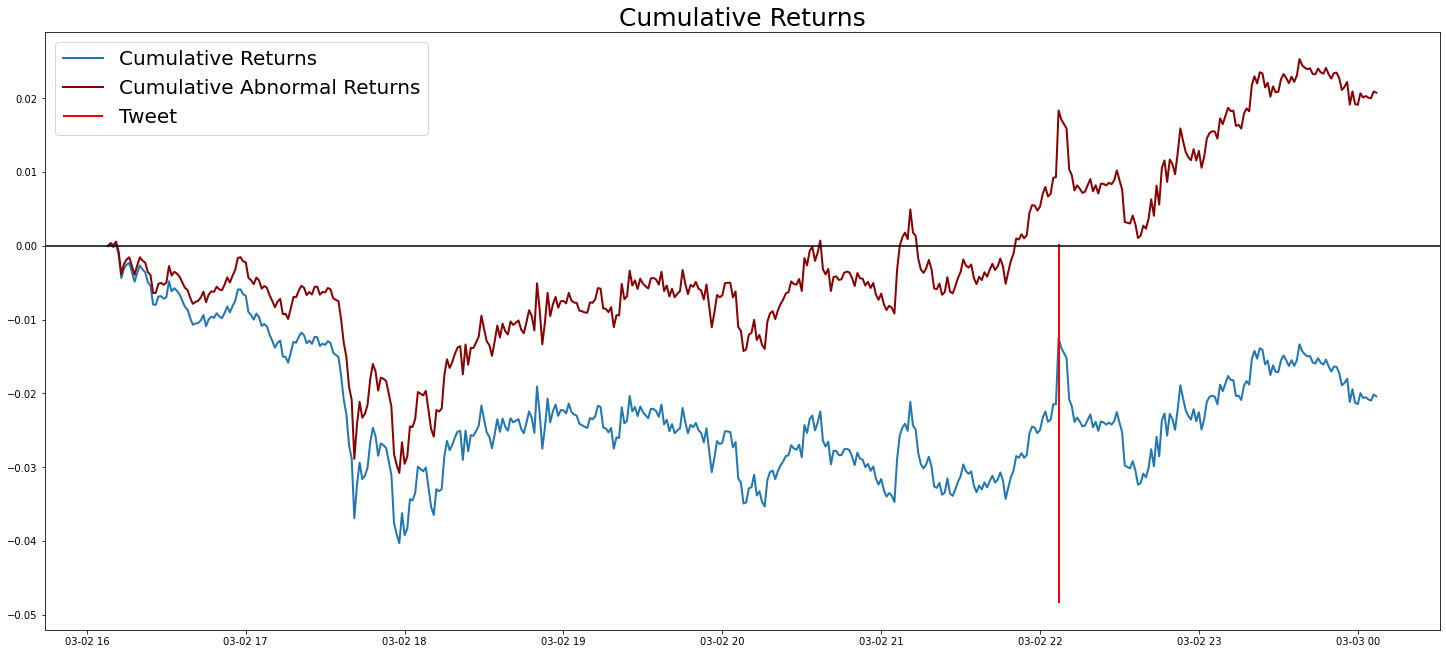

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -0.00010039549519261607
T[0; 1] =  2.113333268326683
T[0; 5] =  1.0258720188655341
T[0; 10] =  0.877224295833998
T[0; 30] =  0.5812178387781481
T[0; 60] =  0.7533592923855481
T[0; 120] =  1.0635008610087908


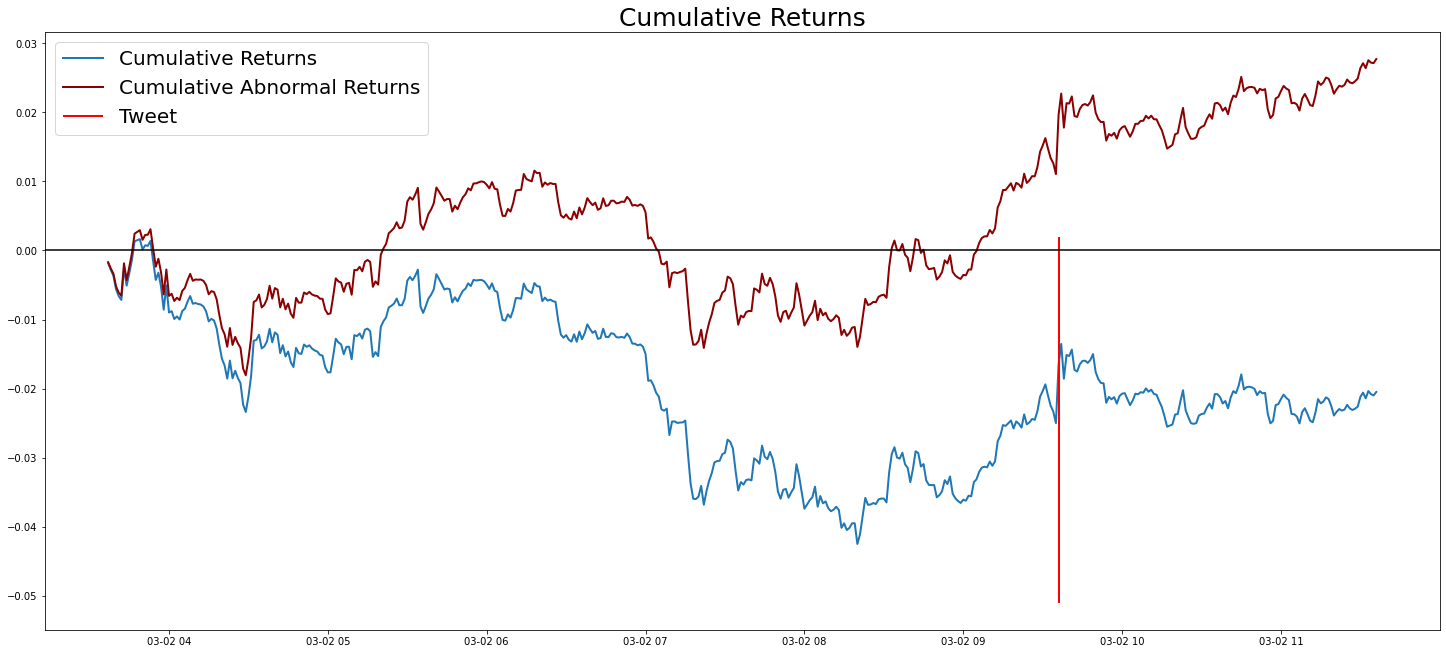

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00010887077577759035
T[0; 1] =  36.55281316950707
T[0; 5] =  1.5140698722431378
T[0; 10] =  1.176575069870311
T[0; 30] =  1.3618579190372155
T[0; 60] =  0.8162765245107151
T[0; 120] =  0.8408349805896936


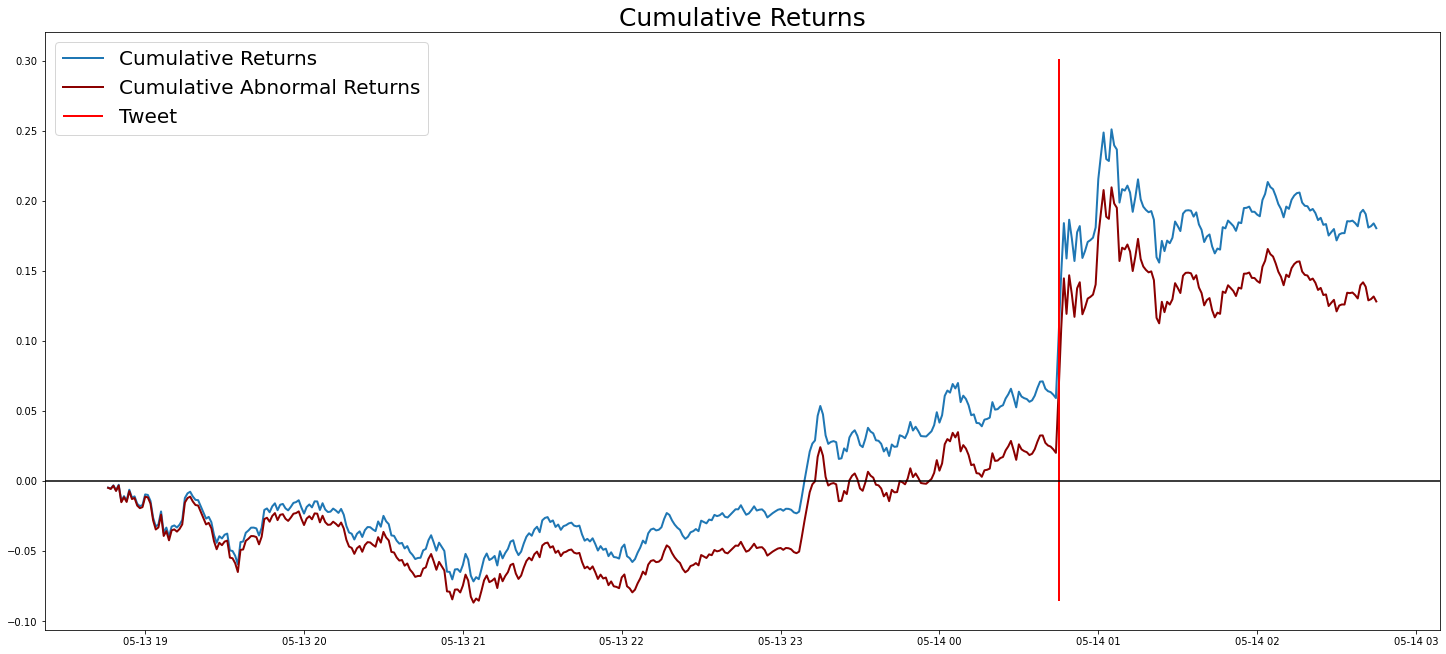

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -4.16072305960986e-05
T[0; 1] =  0.16153040822757547
T[0; 5] =  0.6979062495460139
T[0; 10] =  0.3200655677239611
T[0; 30] =  0.42702575838081386
T[0; 60] =  0.43417457183770564
T[0; 120] =  0.4538281960088398


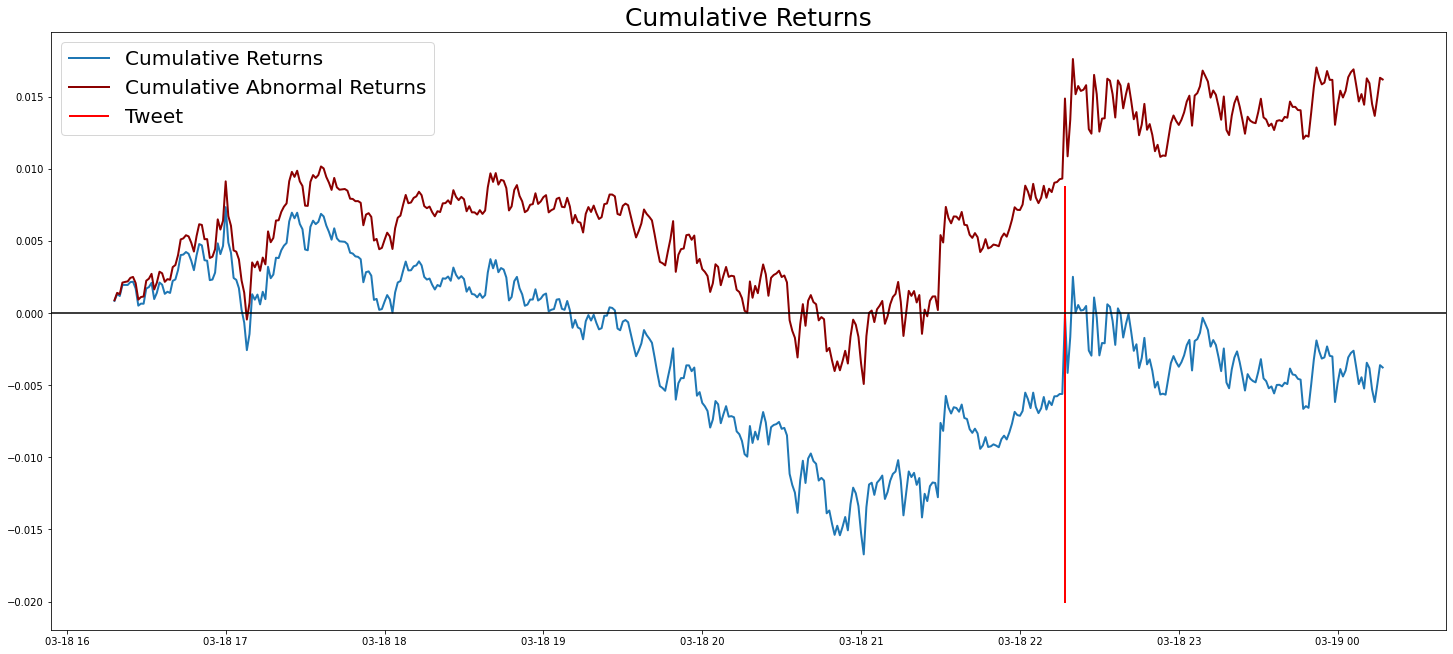

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -4.17082796415421e-05
T[0; 1] =  0.7837267944480083
T[0; 5] =  0.7924927102959738
T[0; 10] =  0.33162665164075167
T[0; 30] =  0.29951329864468373
T[0; 60] =  0.019810139480682498
T[0; 120] =  -0.18680282408573773


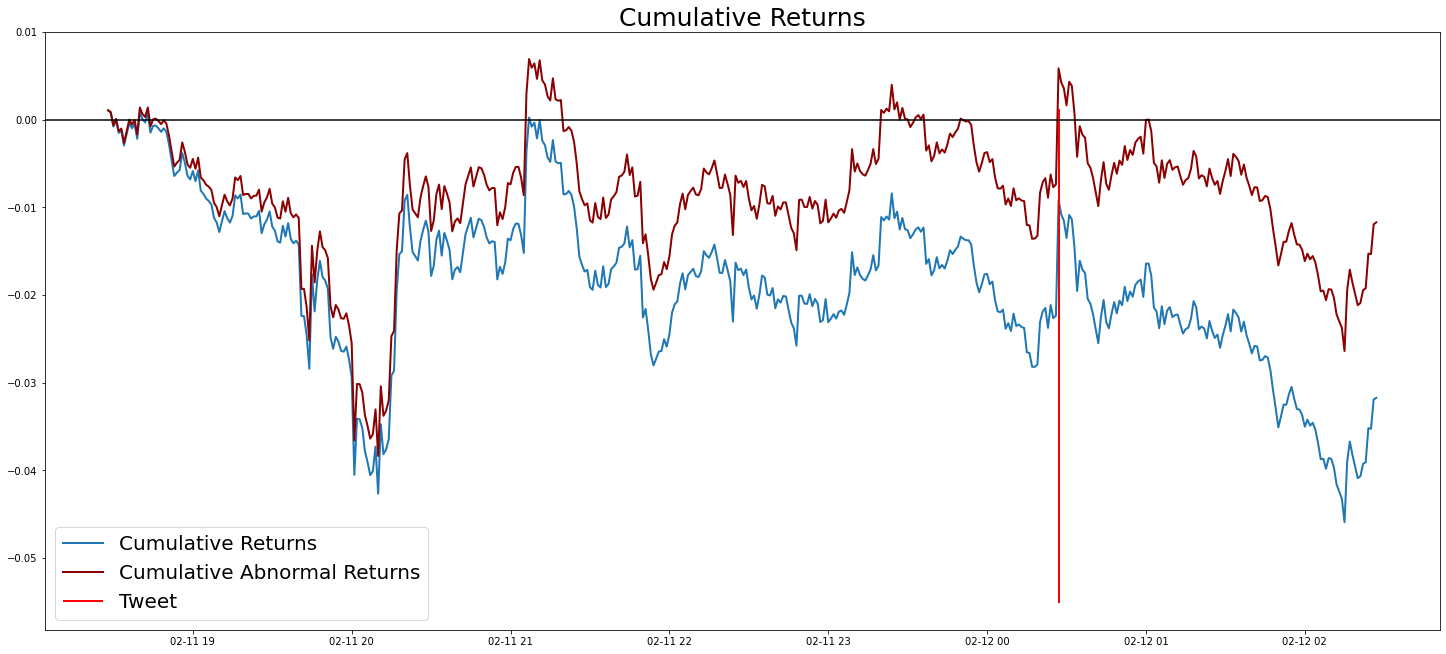

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -1.6371252156740373e-05
T[0; 1] =  4.1542470959974205
T[0; 5] =  2.958943059495974
T[0; 10] =  2.32398132209881
T[0; 30] =  1.7585705002047394
T[0; 60] =  2.2041010885233048
T[0; 120] =  1.5182479258619295


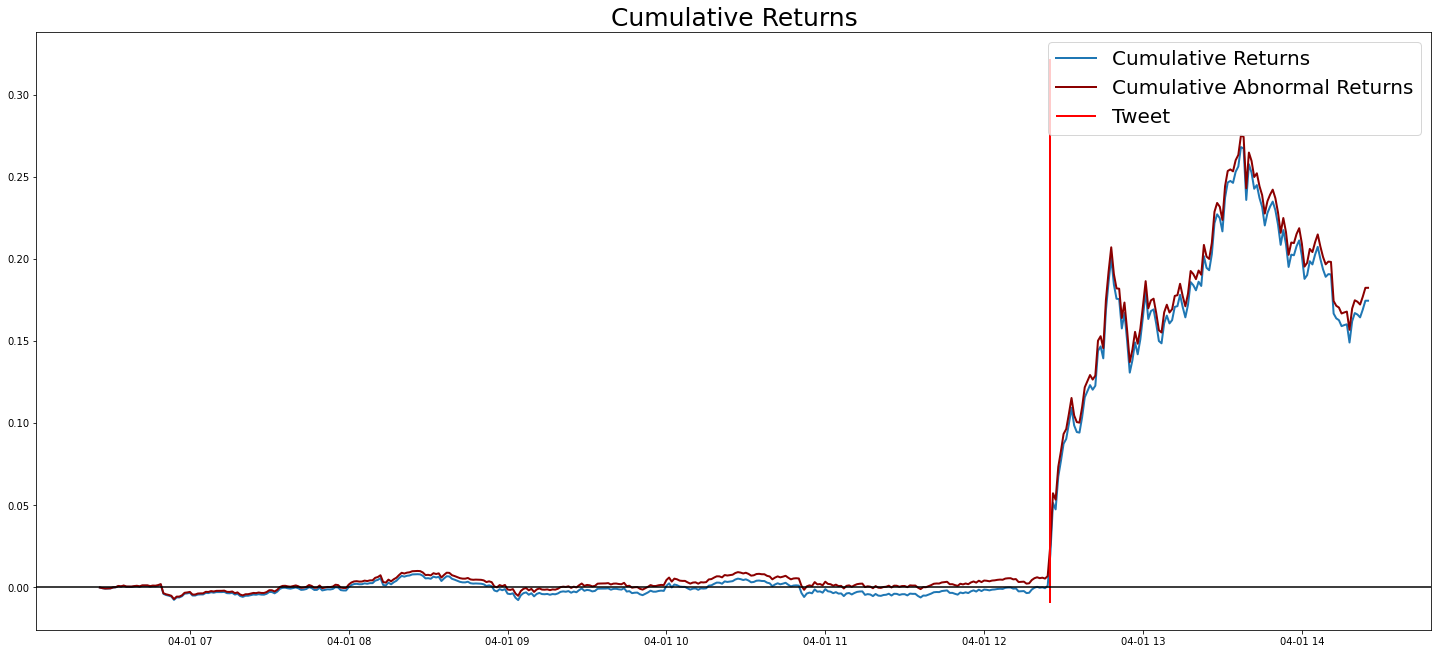

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.0003817275321941493
T[0; 1] =  5.341888777574503
T[0; 5] =  2.443118029056409
T[0; 10] =  0.8495380842379692
T[0; 30] =  0.2537131971035636
T[0; 60] =  -0.09489119750266413
T[0; 120] =  -0.6602655909157705


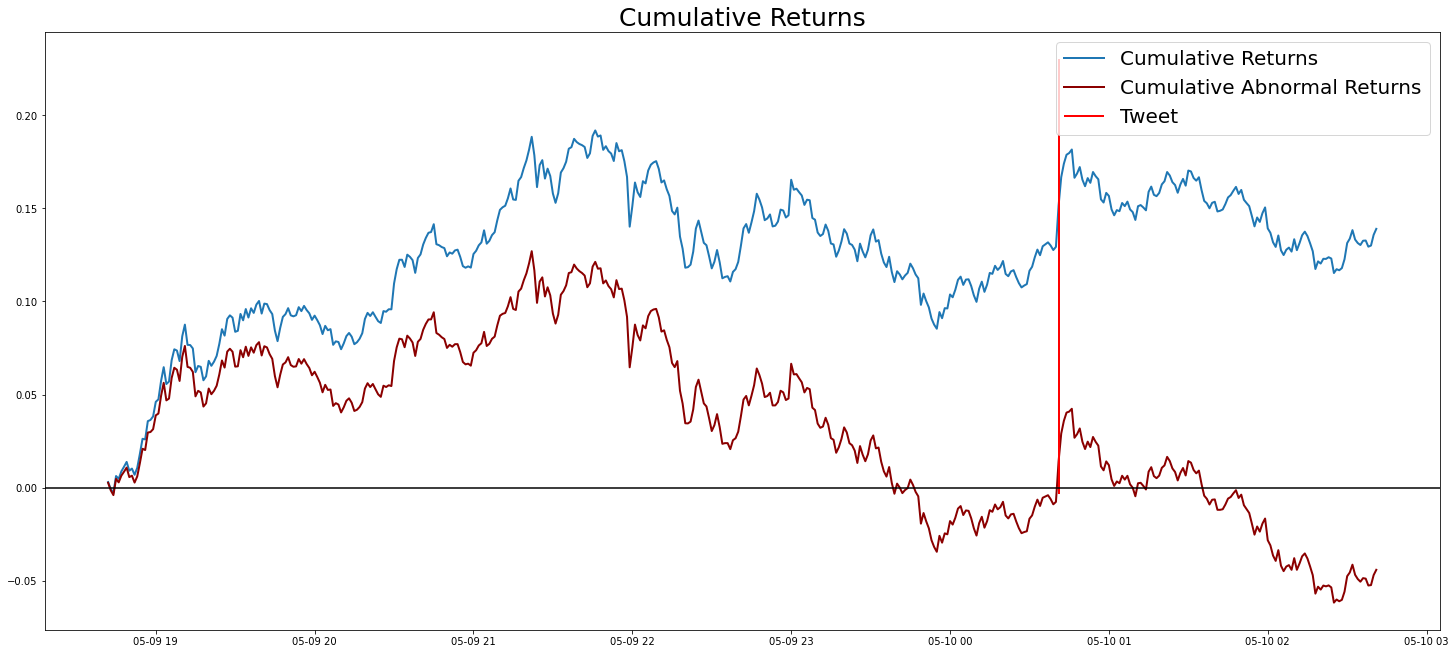

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -1.408314672051439e-05
T[0; 1] =  5.211132674486299
T[0; 5] =  0.9740316765177042
T[0; 10] =  0.6902910076976517
T[0; 30] =  0.448255229804778
T[0; 60] =  0.5482937402687413
T[0; 120] =  0.5473907514361356


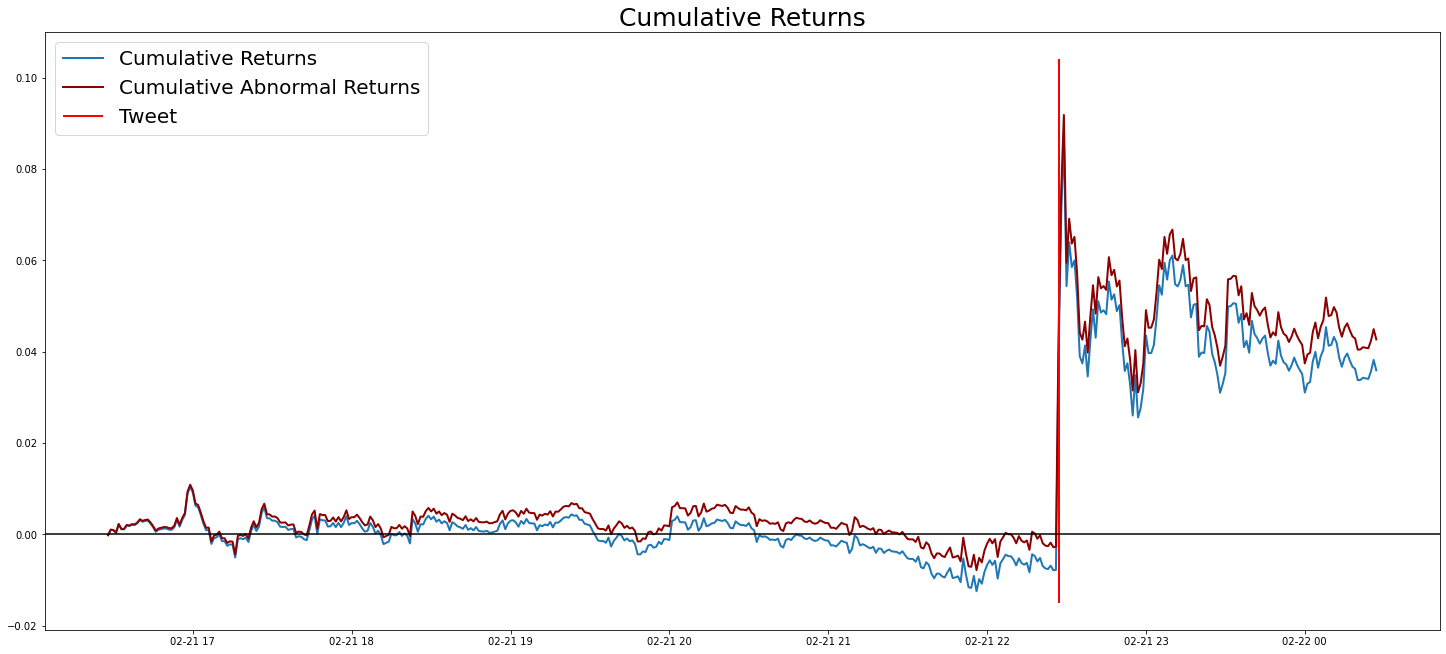

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00031219382768720745
T[0; 1] =  19.131575808068394
T[0; 5] =  1.090932677314183
T[0; 10] =  0.3055742311943549
T[0; 30] =  -0.16476521355672158
T[0; 60] =  -0.15375483830857314
T[0; 120] =  -0.8498693763890078


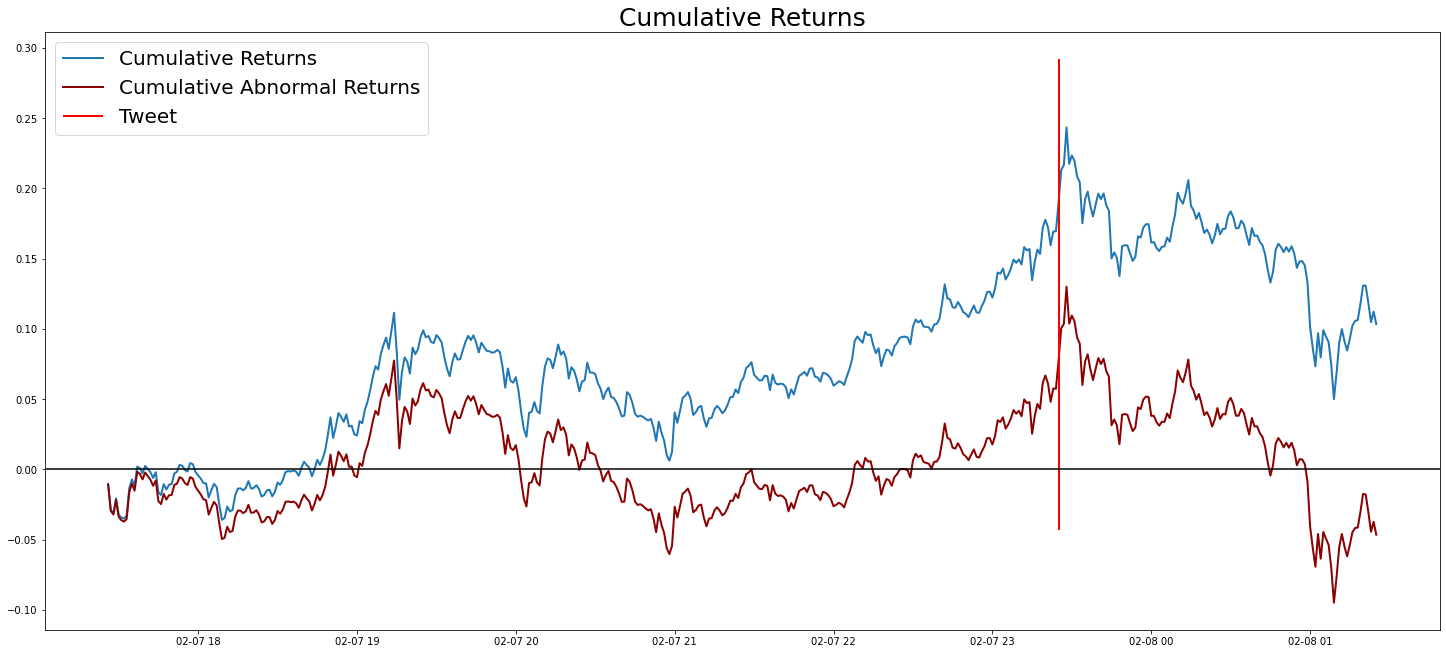

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  1.83223221846963e-05
T[0; 1] =  4.222892007230923
T[0; 5] =  2.237424241569305
T[0; 10] =  3.0053547210254563
T[0; 30] =  1.9540934686438989
T[0; 60] =  1.6782716927793644
T[0; 120] =  0.9518271139073285


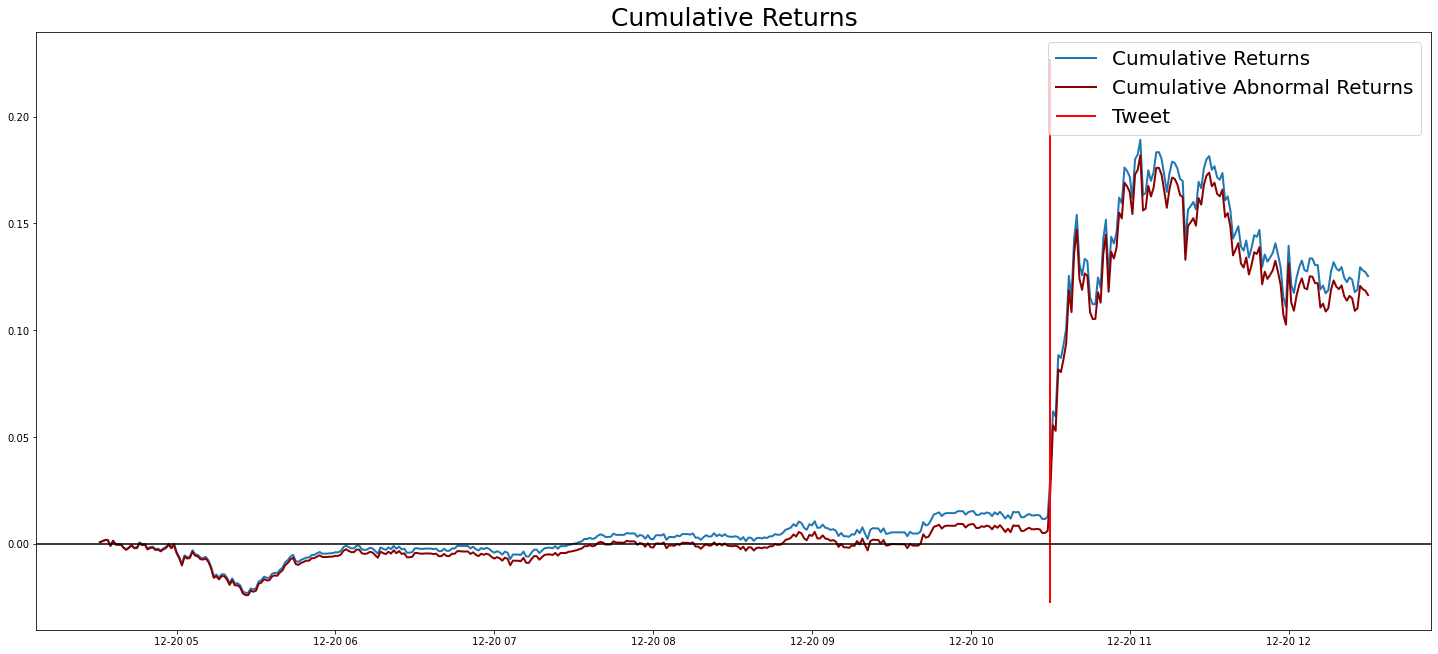

ar_frame:
        AR_0      AR_1      AR_2      AR_3      AR_4      AR_5      AR_6  \
0   0.019977  0.012351  0.002259 -0.004519  0.002335  0.001726 -0.002268   
1   0.000881 -0.001224 -0.000187 -0.000013 -0.003136 -0.000601  0.000473   
2   0.009695  0.001679  0.001283  0.001715  0.001175 -0.001651   0.00431   
3   0.032823  0.018142 -0.008096 -0.007274 -0.007263 -0.000272  0.000021   
4   0.004594 -0.007438  0.000037  0.004818  0.001954 -0.006823 -0.004963   
5   0.036633  0.059703  0.037512  0.001326  0.018879 -0.034939  0.016267   
6   0.008927  0.025804  0.023444 -0.003585 -0.001872  0.021135  -0.00783   
7   0.000256 -0.001738  0.005132 -0.000361 -0.000121 -0.001081 -0.000396   
8   0.035265  0.023415  0.026296  0.026363  0.008207  0.005409  0.015006   
9    0.00904 -0.001205 -0.000594 -0.000616 -0.005531 -0.000832 -0.002049   
10  0.008581  0.003069  -0.00493  0.003541 -0.000059  0.001031 -0.002833   
11  0.043251  0.045684  0.035555 -0.025347  0.027536 -0.013409 -0.016251   
12

In [54]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))


ar_ges = pd.DataFrame(columns=['AR_0', 'AR_1', 'AR_2', 'AR_3', 'AR_4', 'AR_5', 'AR_6', 'AR_7', 'AR_8', 'AR_9', 'AR_10', ])
car_ges = pd.DataFrame(columns = ['CAR_1', 'CAR_2', 'CAR_5', 'CAR_10', 'CAR_30', 'CAR_60', 'CAR_120'])

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    # Es werden nach Tweets gesucht, die 240 Minuten vor und 100 Minuten nach dem Event stattgefunden haben.
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-240*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    # Ausrechnen der Renditen
    doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
    # Erste Rendite wird 0 gesetzt
    doge_sliced.loc[0, 'log_returns'] = 0
    # Kumulierte Renditen
    doge_sliced['cum_log_returns'] = np.cumsum(doge_sliced['log_returns'])

    # Expected Returns which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_return = np.mean(doge_sliced['log_returns'].iloc[1:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300
    print('Expected Return = ', expected_return)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_returns'] = doge_sliced['log_returns'] - expected_return
    doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])


    ar_values = []
    for event_horizon in range(11):
        ar_values.append(doge_sliced['abnormal_returns'].iloc[360+event_horizon])
    ar_ges = pd.concat([ar_ges, pd.DataFrame([ar_values], columns=ar_ges.columns)], ignore_index=True)



    car_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        car_values.append(doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].sum())
    car_ges = pd.concat([car_ges, pd.DataFrame([car_values], columns=car_ges.columns)], ignore_index=True)

    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', (doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].mean() / doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1)) # <-- richtiger Wert
        
    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['cum_log_returns'], lw=2, label='Cumulative Returns')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_returns_cum'], lw=2, label='Cumulative Abnormal Returns', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Tweet', ymin=doge_sliced['cum_log_returns'].min()*1.2, ymax=doge_sliced['cum_log_returns'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_returns_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Cumulative Returns', size=25)

    plt.show()

print('ar_frame:')
print(ar_ges)

print('car_frame:')
print(car_ges)

In [61]:
for s in ar_ges.columns:
    print(s)
    print('mean: ', ar_ges[s].mean())
    print('pos: ', sum(ar_ges[s] > 0) / len(ar_ges[s]))
    print('t-stat: ' ,ar_ges[s].mean() / ar_ges[s].std() * np.sqrt(len(ar_ges[s])))

    test_statistic, p_value = wilcoxon(ar_ges[s], method='exact', alternative='two-sided')

    # Gib die Teststatistik und den p-Wert aus
    print("z-stat:", test_statistic)
    print("p-Wert:", p_value)
    print(np.round(ar_ges[s].mean()*100, 4), '\% & ', 
          np.round(ar_ges[s].mean() / ar_ges[s].std() * np.sqrt(len(ar_ges[s])), 2), ' & ',
          np.round(test_statistic, 2), ' & ',
          int(np.round(sum(ar_ges[s] > 0) / len(ar_ges[s])*100, 0)), '\%')
    print('\n')

AR_0
mean:  0.01870859708900443
pos:  1.0
t-stat:  5.747904145155615
z-stat: 0.0
p-Wert: 3.814697265625e-06
1.8709 \% &  5.75  &  0.0  &  100 \%


AR_1
mean:  0.015977179019294418
pos:  0.6842105263157895
t-stat:  3.7430818410100626
z-stat: 26.0
p-Wert: 0.003917694091796875
1.5977 \% &  3.74  &  26.0  &  68 \%


AR_2
mean:  0.007349791388806473
pos:  0.631578947368421
t-stat:  2.3435791676020434
z-stat: 51.0
p-Wert: 0.07987594604492188
0.735 \% &  2.34  &  51.0  &  63 \%


AR_3
mean:  0.0023944114092633124
pos:  0.5263157894736842
t-stat:  0.669976316367057
z-stat: 78.0
p-Wert: 0.5152778625488281
0.2394 \% &  0.67  &  78.0  &  53 \%


AR_4
mean:  0.0018125102515965444
pos:  0.5263157894736842
t-stat:  0.7287765827244401
z-stat: 77.0
p-Wert: 0.48996734619140625
0.1813 \% &  0.73  &  77.0  &  53 \%


AR_5
mean:  -0.0006109394851021823
pos:  0.47368421052631576
t-stat:  -0.24424927564164486
z-stat: 91.0
p-Wert: 0.8905677795410156
-0.0611 \% &  -0.24  &  91.0  &  47 \%


AR_6
mean:  -0.000

In [62]:
for s in car_ges.columns:
      print(s)
      print('mean: ', car_ges[s].mean())
      print('pos: ', sum(car_ges[s] > 0) / len(car_ges[s]))
      print('t-stat: ' ,car_ges[s].mean() / car_ges[s].std() * np.sqrt(len(car_ges[s])))

      test_statistic, p_value = wilcoxon(car_ges[s], method='approx', alternative='two-sided')

      # Gib die Teststatistik und den p-Wert aus
      print("z-stat:", test_statistic)
      print("p-Wert:", p_value)
      print(np.round(car_ges[s].mean()*100, 4), '\% & ', 
            np.round(car_ges[s].mean() / car_ges[s].std() * np.sqrt(len(car_ges[s])), 2), ' & ',
            np.round(test_statistic, 2), ' & ',
            int(np.round(sum(car_ges[s] > 0) / len(car_ges[s])*100, 0)), '\%')
      print('\n')

CAR_1
mean:  0.034685776108298844
pos:  0.8421052631578947
t-stat:  4.864516719892128
z-stat: 7.0
p-Wert: 0.00039814247498266234
3.4686 \% &  4.86  &  7.0  &  84 \%


CAR_2
mean:  0.042035567497105304
pos:  0.8947368421052632
t-stat:  4.398299629377713
z-stat: 3.0
p-Wert: 0.0002136700043906972
4.2036 \% &  4.4  &  3.0  &  89 \%


CAR_5
mean:  0.04563154967286299
pos:  0.8947368421052632
t-stat:  4.537315227689752
z-stat: 7.0
p-Wert: 0.00039814247498266234
4.5632 \% &  4.54  &  7.0  &  89 \%


CAR_10
mean:  0.05071466274731709
pos:  0.8421052631578947
t-stat:  3.8513554181381324
z-stat: 12.0
p-Wert: 0.0008374789865327178
5.0715 \% &  3.85  &  12.0  &  84 \%


CAR_30
mean:  0.04439563031211417
pos:  0.7894736842105263
t-stat:  3.093081019321878
z-stat: 34.0
p-Wert: 0.014097354120504295
4.4396 \% &  3.09  &  34.0  &  79 \%


CAR_60
mean:  0.043837213744744905
pos:  0.7894736842105263
t-stat:  3.091519357953325
z-stat: 23.0
p-Wert: 0.0037622518256999957
4.3837 \% &  3.09  &  23.0  &  79 \%

In [63]:
ar_total = pd.concat([ar_ges, pd.read_csv('ar_ges_bitcoin.csv')], ignore_index=True)
car_total = pd.concat([car_ges, pd.read_csv('car_ges_bitcoin.csv')], ignore_index=True)

In [69]:
for s in ar_total.columns:
    print(s)
    print('mean: ', ar_total[s].mean())
    print('pos: ', sum(ar_total[s] > 0) / len(ar_total[s]))
    print('t-stat: ' ,ar_total[s].mean() / ar_total[s].std() * np.sqrt(len(ar_total[s])))

    test_statistic, p_value = wilcoxon(ar_total[s], method='exact', alternative='two-sided')

    # Gib die Teststatistik und den p-Wert aus
    print("z-stat:", test_statistic)
    print("p-Wert:", p_value)
    print(np.round(ar_total[s].mean()*100, 4), '\% & ', 
          np.round(ar_total[s].mean() / ar_total[s].std() * np.sqrt(len(ar_total[s])), 2), ' & ',
          np.round(test_statistic, 2), ' & ',
          int(np.round(sum(ar_total[s] > 0) / len(ar_total[s])*100, 0)), '\%')
    print('\n')

AR_0
mean:  0.01417144875676813
pos:  0.88
t-stat:  4.786419250923639
z-stat: 15.0
p-Wert: 8.165836334228516e-06
1.4171 \% &  4.79  &  15.0  &  88 \%


AR_1
mean:  0.011777004303837163
pos:  0.64
t-stat:  3.267569360532346
z-stat: 67.0
p-Wert: 0.008822321891784668
1.1777 \% &  3.27  &  67.0  &  64 \%


AR_2
mean:  0.005067513857882736
pos:  0.56
t-stat:  1.9772618955408408
z-stat: 111.0
p-Wert: 0.17295855283737183
0.5068 \% &  1.98  &  111.0  &  56 \%


AR_3
mean:  0.0016066274584105775
pos:  0.48
t-stat:  0.5904993625571984
z-stat: 146.0
p-Wert: 0.6720751523971558
0.1607 \% &  0.59  &  146.0  &  48 \%


AR_4
mean:  0.0017119860781198513
pos:  0.56
t-stat:  0.9008162944839017
z-stat: 126.0
p-Wert: 0.33878785371780396
0.1712 \% &  0.9  &  126.0  &  56 \%


AR_5
mean:  -0.0012949488319535466
pos:  0.4
t-stat:  -0.654105267771078
z-stat: 139.0
p-Wert: 0.5424043536186218
-0.1295 \% &  -0.65  &  139.0  &  40 \%


AR_6
mean:  -0.00040026546674001693
pos:  0.48
t-stat:  -0.2814676296376544
z-

In [71]:
for s in car_total.columns:
      print(s)
      print('mean: ', car_total[s].mean())
      print('pos: ', sum(car_total[s] > 0) / len(car_total[s]))
      print('t-stat: ' ,car_total[s].mean() / car_total[s].std() * np.sqrt(len(car_total[s])))

      test_statistic, p_value = wilcoxon(car_total[s], method='approx', alternative='two-sided')

      # Gib die Teststatistik und den p-Wert aus
      print("z-stat:", test_statistic)
      print("p-Wert:", p_value)
      print(np.round(car_total[s].mean()*100, 4), '\% & ', 
            np.round(car_total[s].mean() / car_total[s].std() * np.sqrt(len(car_total[s])), 2), ' & ',
            np.round(test_statistic, 2), ' & ',
            int(np.round(sum(car_total[s] > 0) / len(car_total[s])*100, 0)), '\%')
      print('\n')

CAR_1
mean:  0.025948453060605295
pos:  0.72
t-stat:  4.1398442838805
z-stat: 42.0
p-Wert: 0.0011857626633755584
2.5948 \% &  4.14  &  42.0  &  72 \%


CAR_2
mean:  0.03101596691848802
pos:  0.8
t-stat:  3.7323408407868297
z-stat: 29.0
p-Wert: 0.0003280582695492452
3.1016 \% &  3.73  &  29.0  &  80 \%


CAR_5
mean:  0.03303963162306491
pos:  0.76
t-stat:  3.6794131631310485
z-stat: 46.0
p-Wert: 0.0017205620157967293
3.304 \% &  3.68  &  46.0  &  76 \%


CAR_10
mean:  0.03720464939299697
pos:  0.72
t-stat:  3.339587172316577
z-stat: 55.0
p-Wert: 0.0038219768150666235
3.7205 \% &  3.34  &  55.0  &  72 \%


CAR_30
mean:  0.031549943986457336
pos:  0.68
t-stat:  2.650338265644701
z-stat: 92.0
p-Wert: 0.05783621656853659
3.155 \% &  2.65  &  92.0  &  68 \%


CAR_60
mean:  0.031866818103110726
pos:  0.68
t-stat:  2.737335583552663
z-stat: 76.0
p-Wert: 0.019941440619873834
3.1867 \% &  2.74  &  76.0  &  68 \%


CAR_120
mean:  0.019377999619415692
pos:  0.64
t-stat:  1.4594489734425515
z-stat:

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


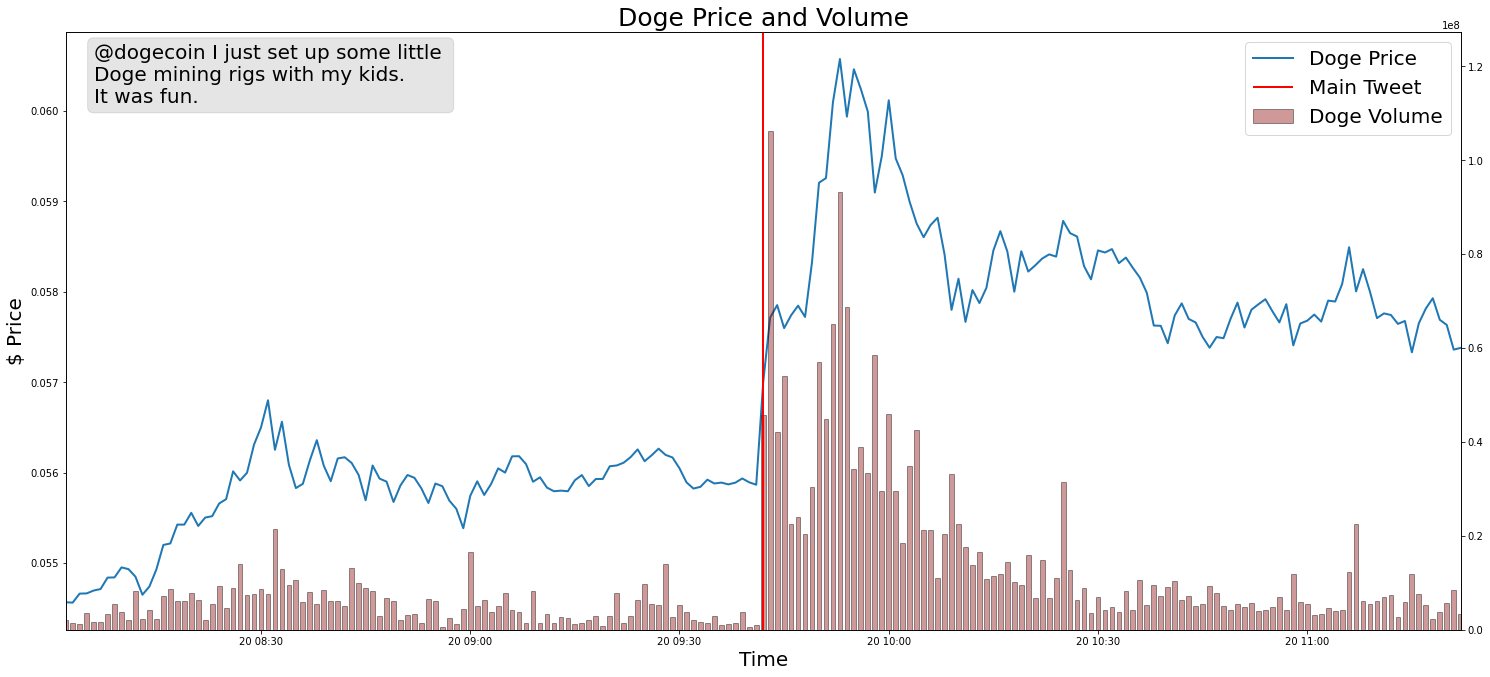

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


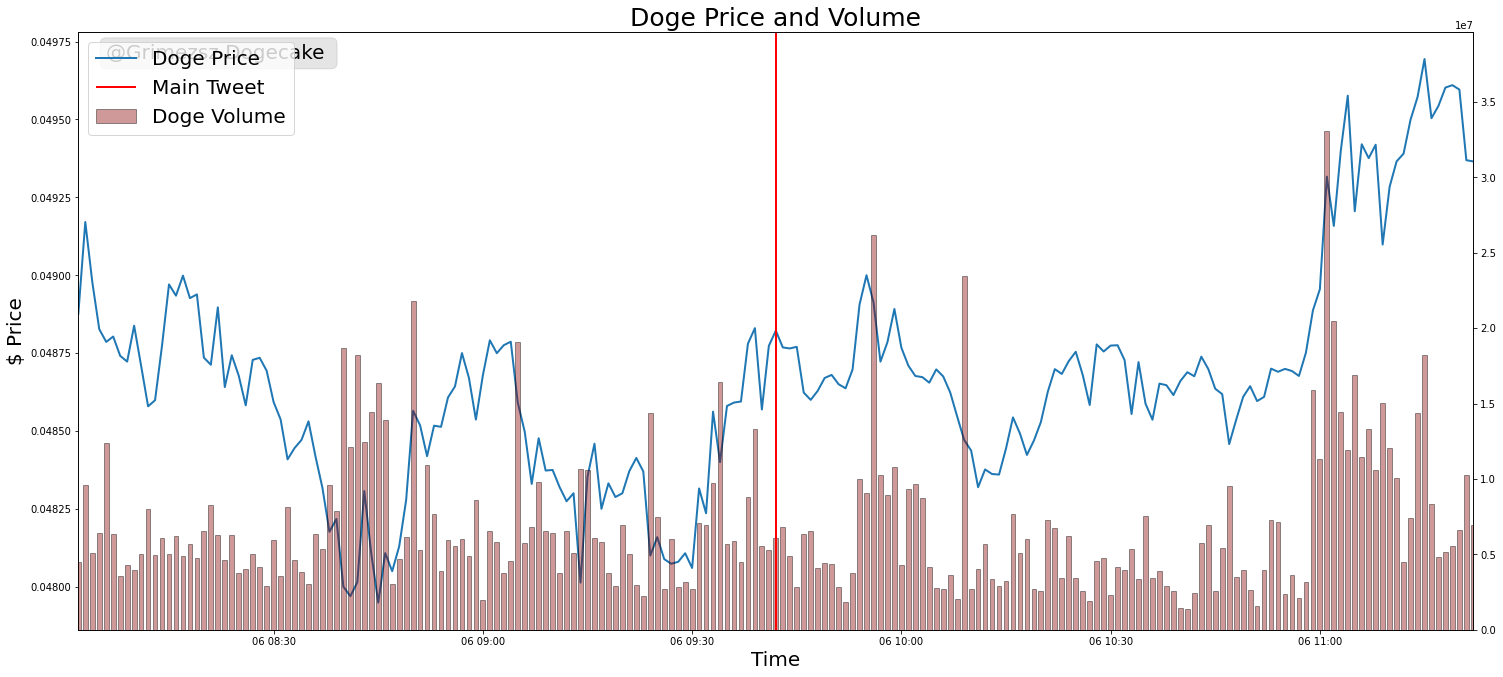

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


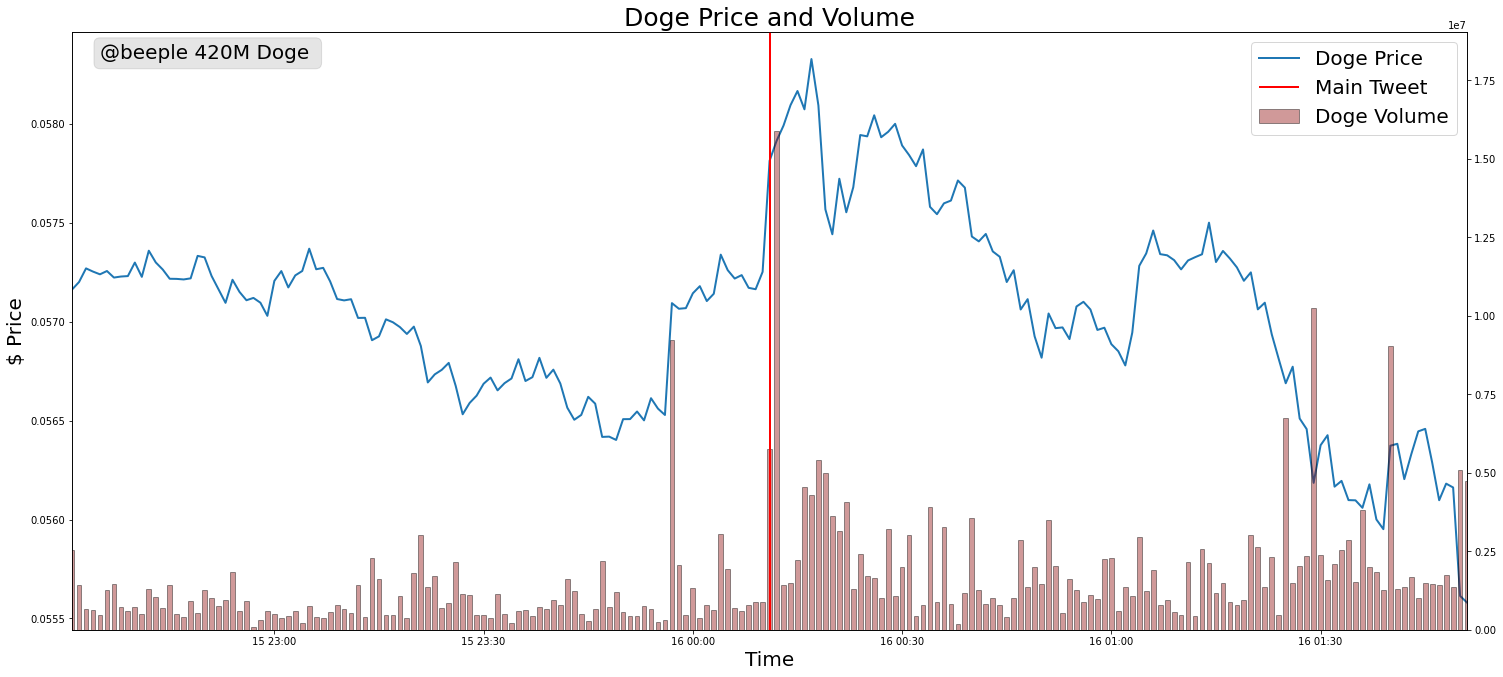

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


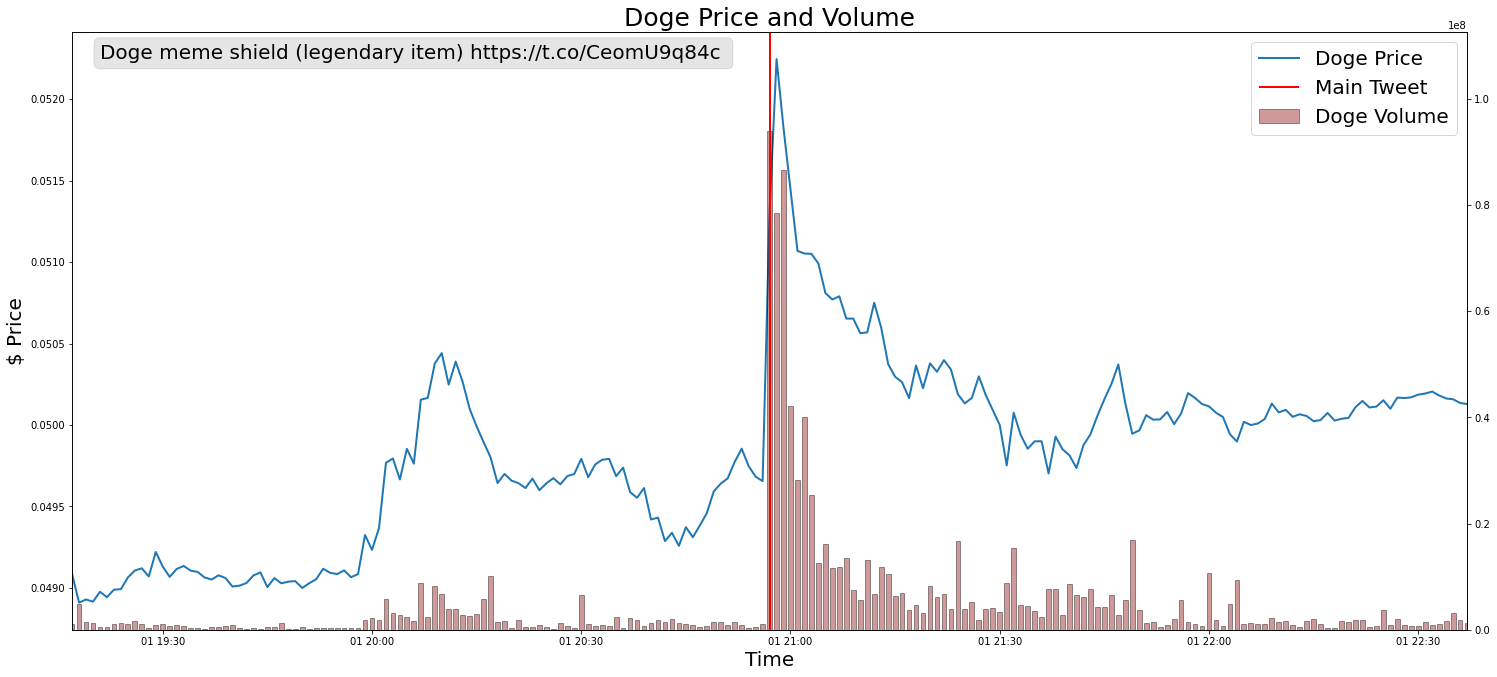

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


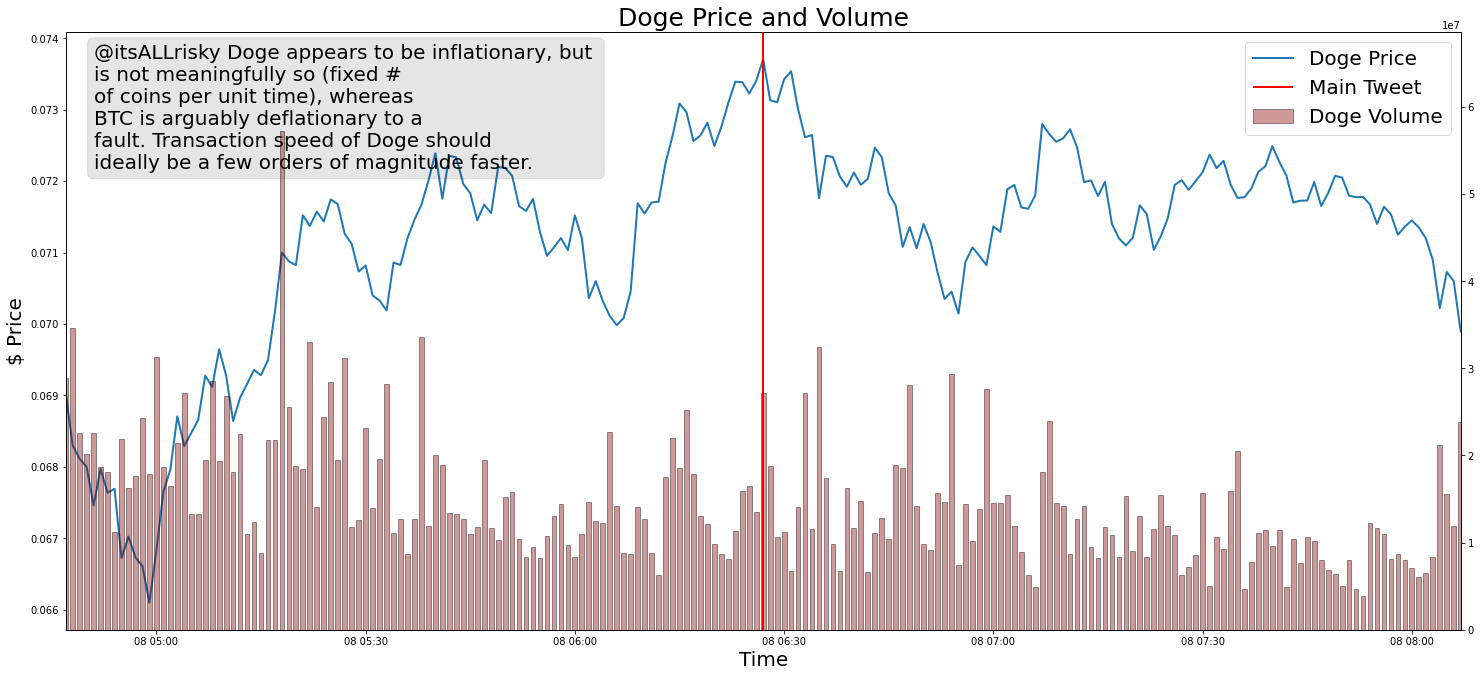

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


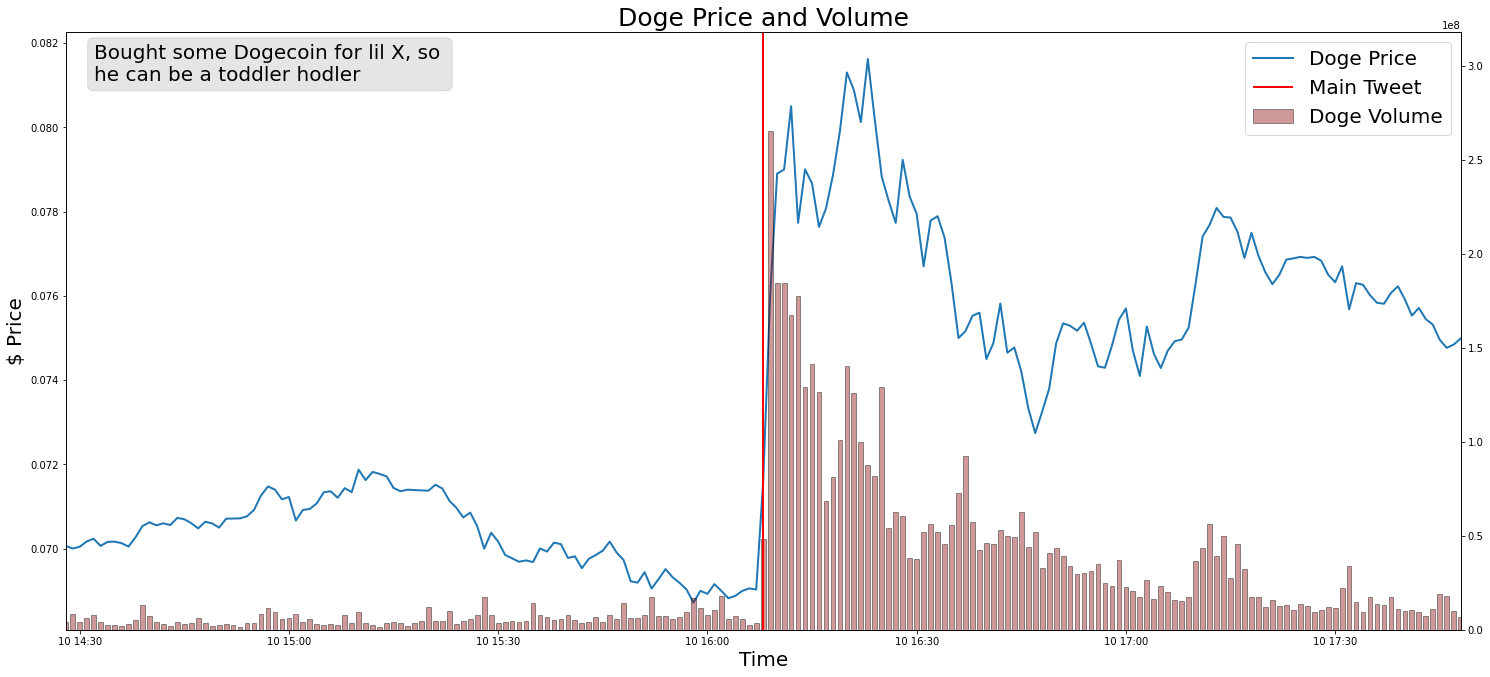

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


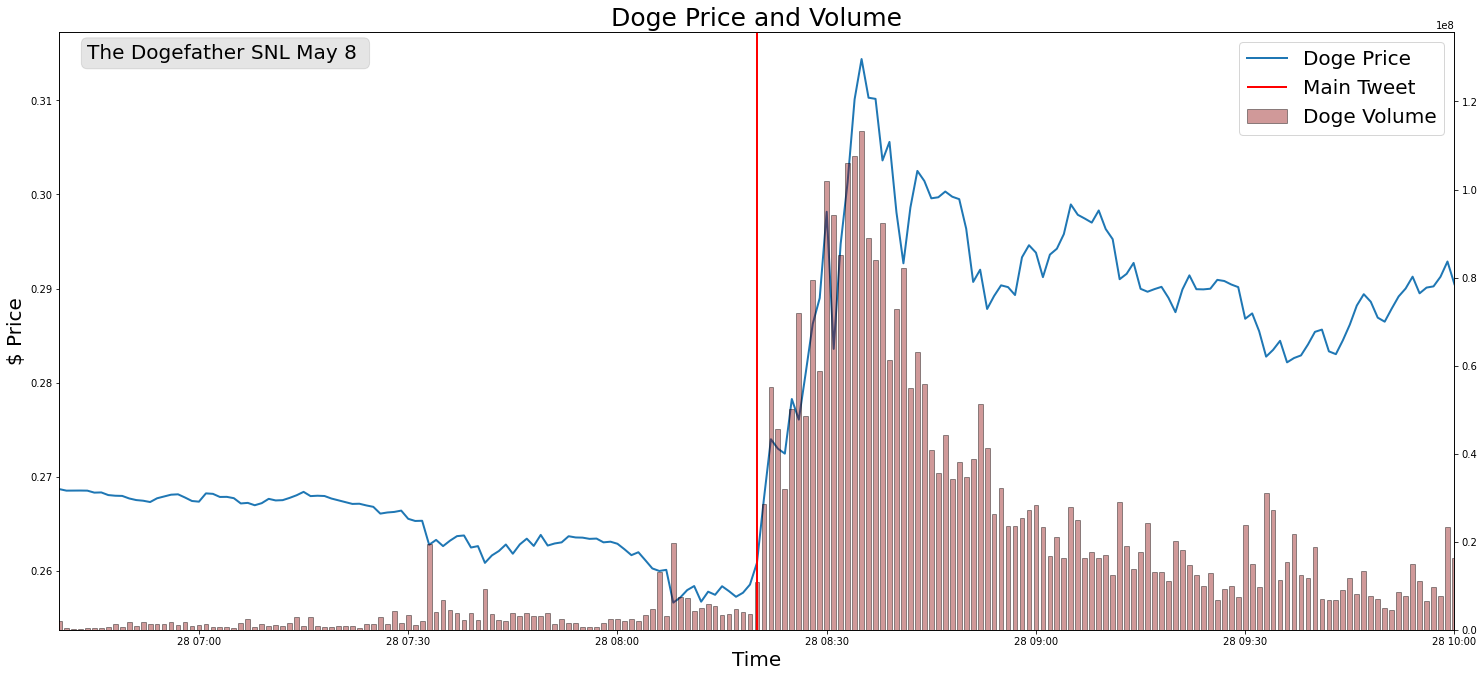

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


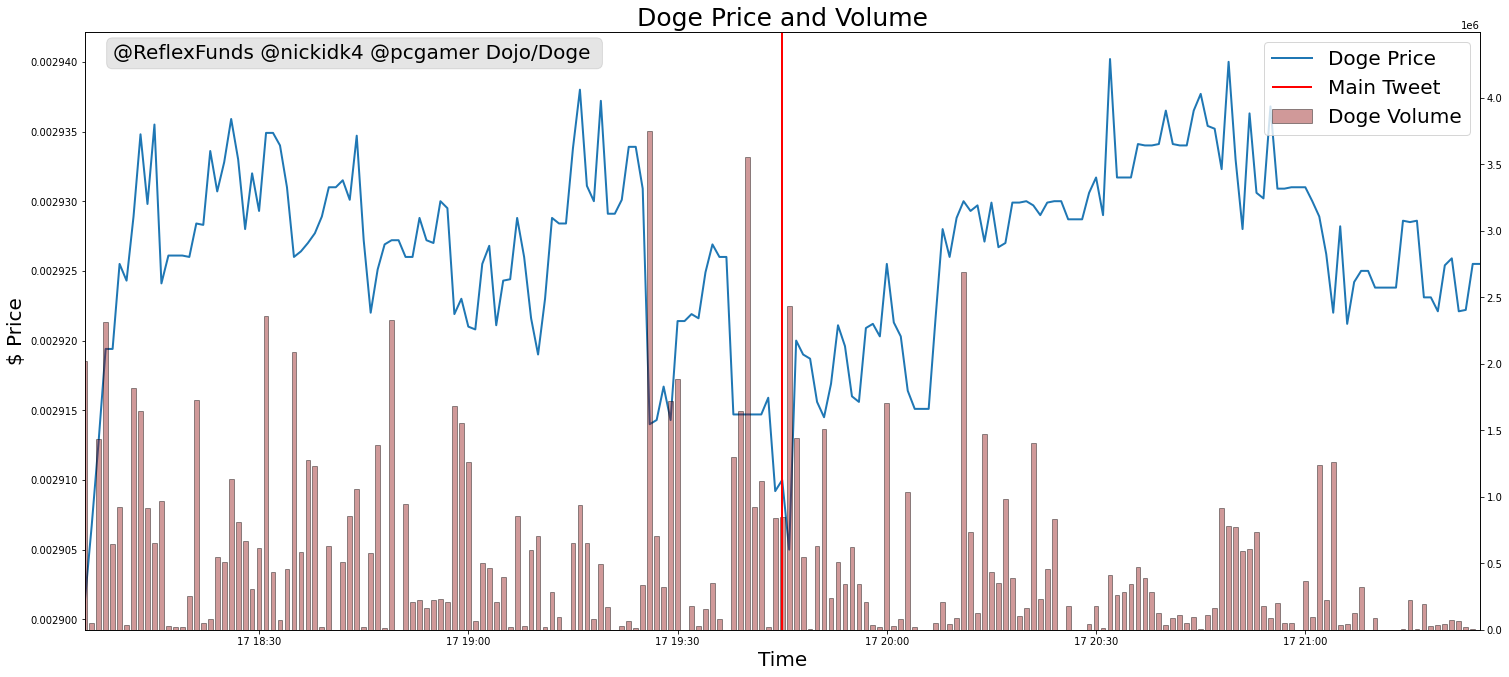

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


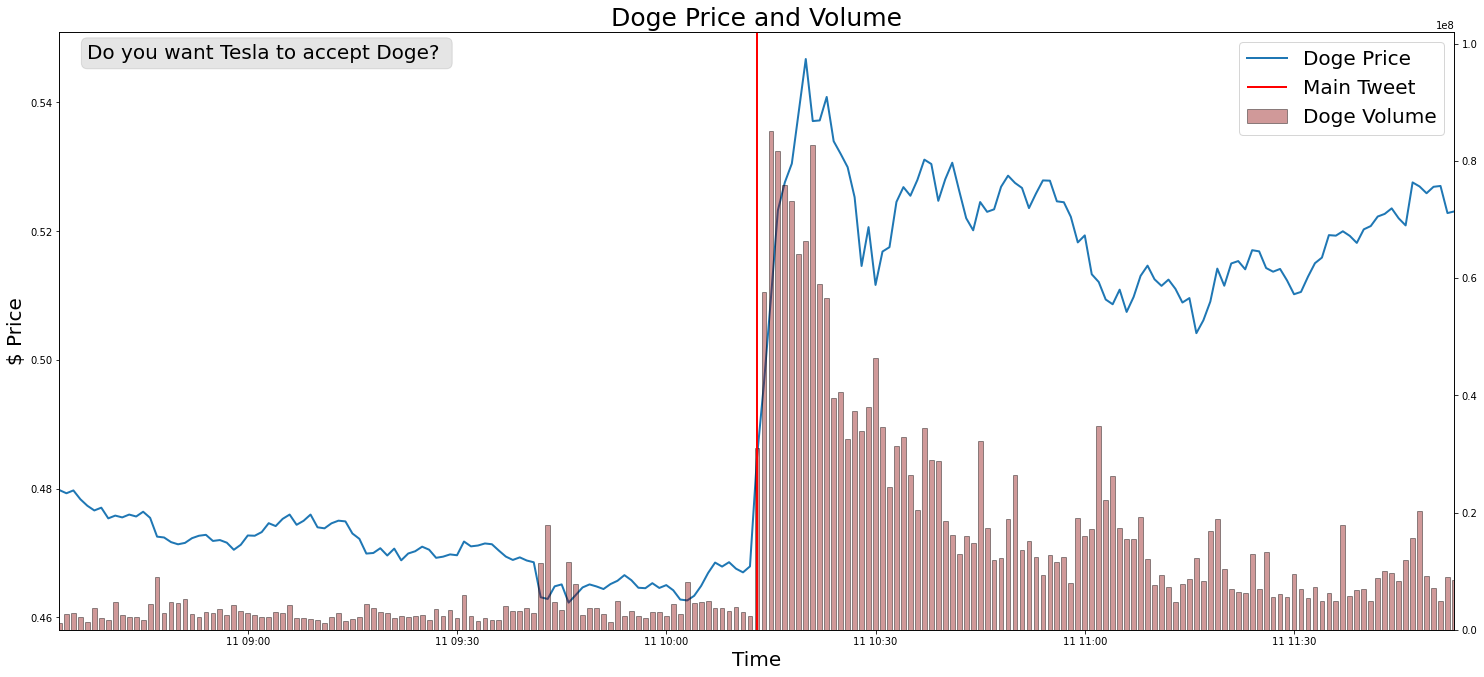

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


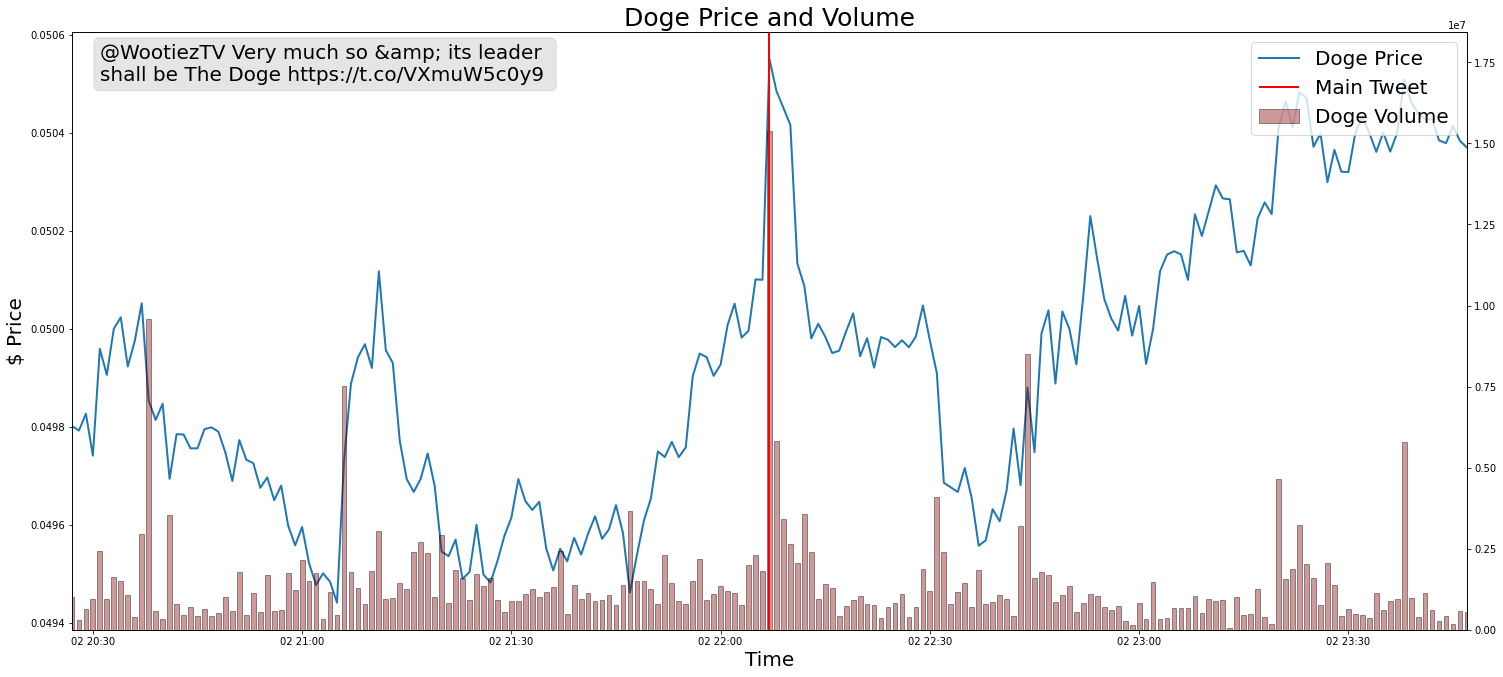

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


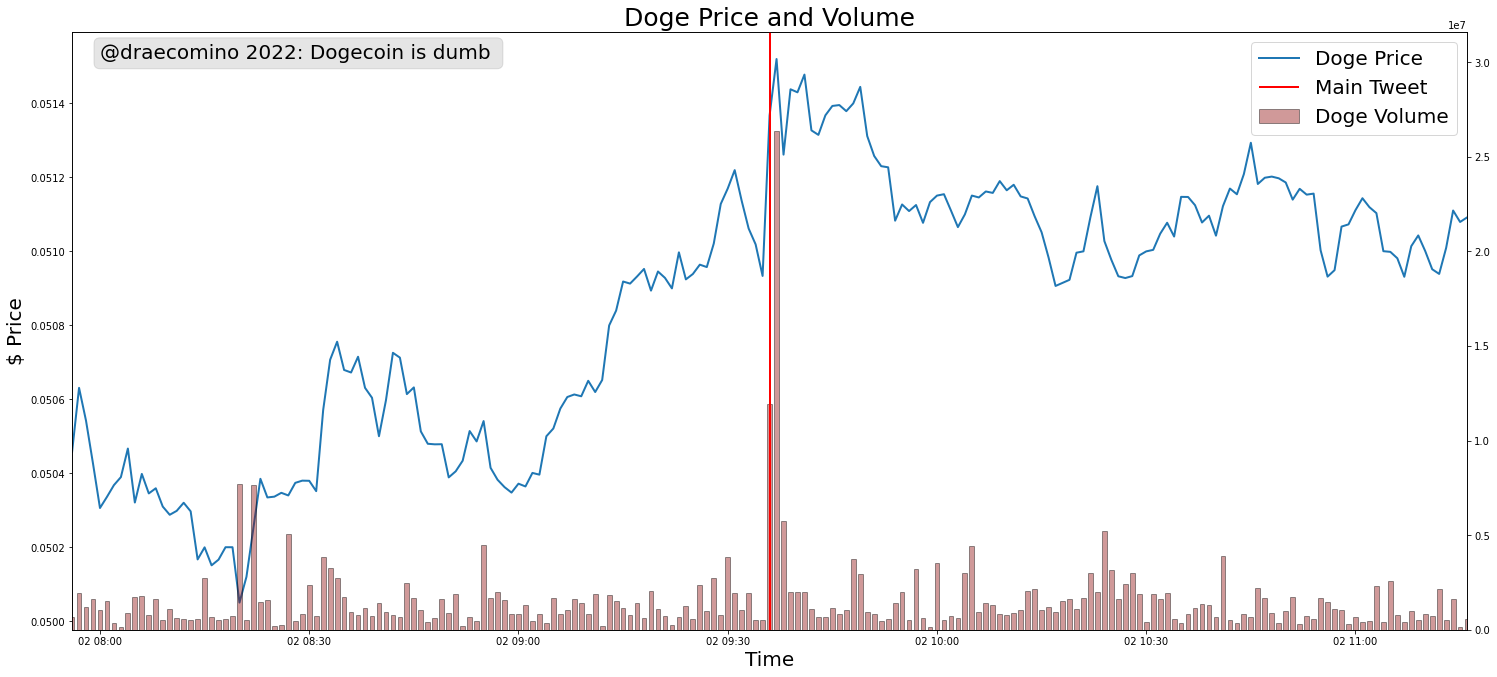

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


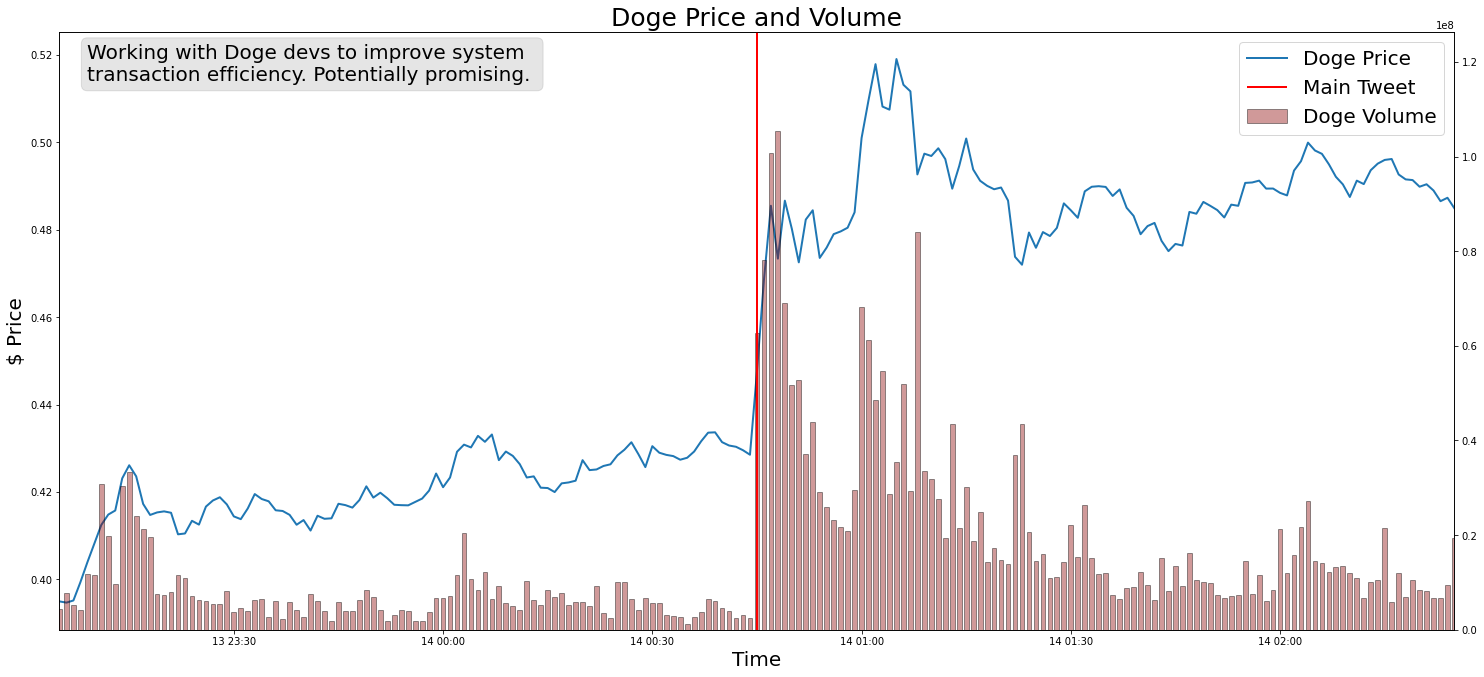

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


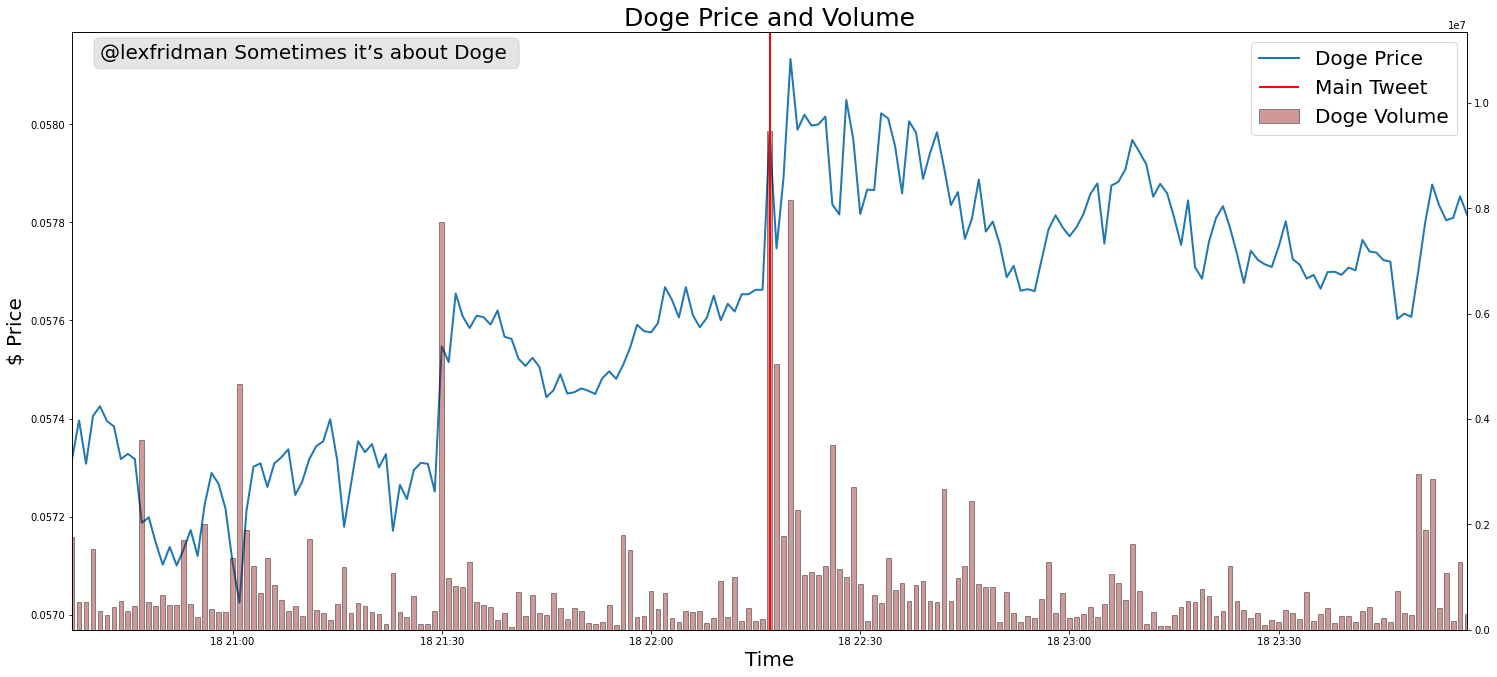

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


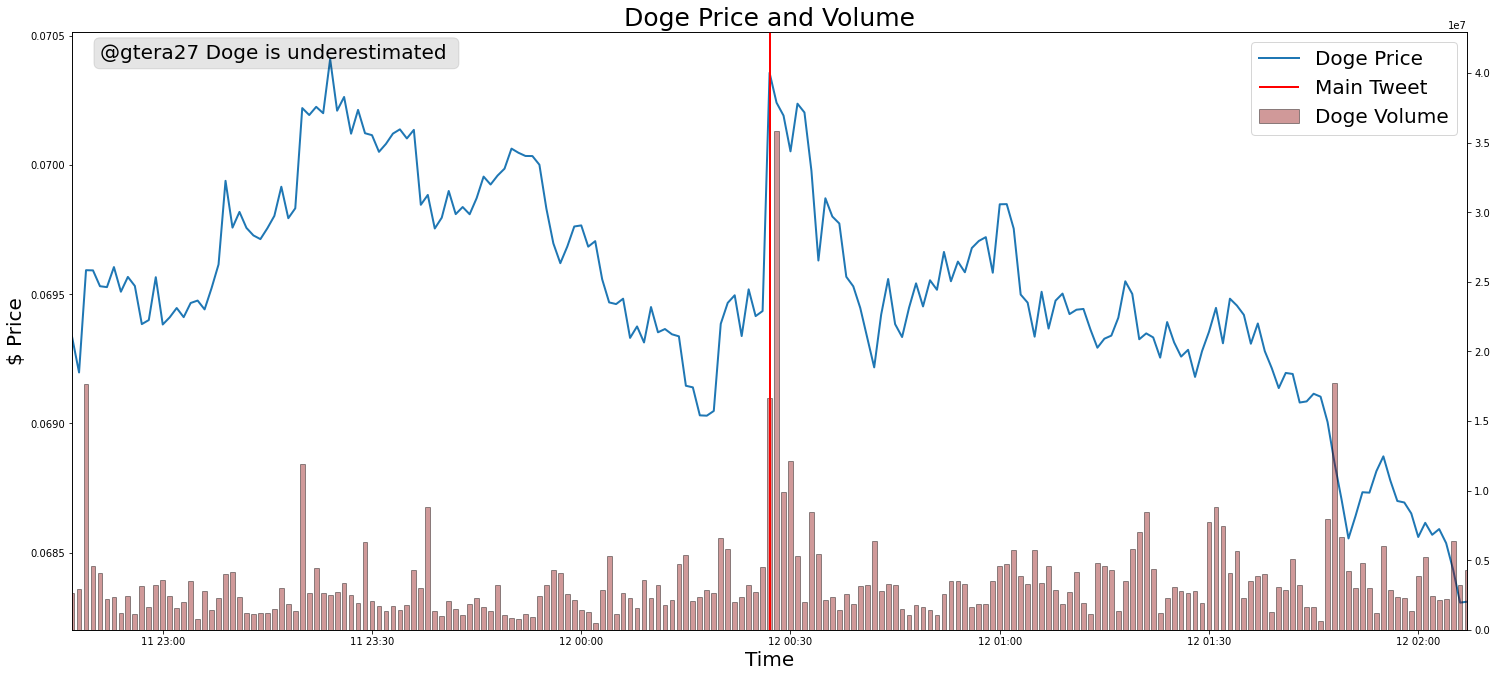

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


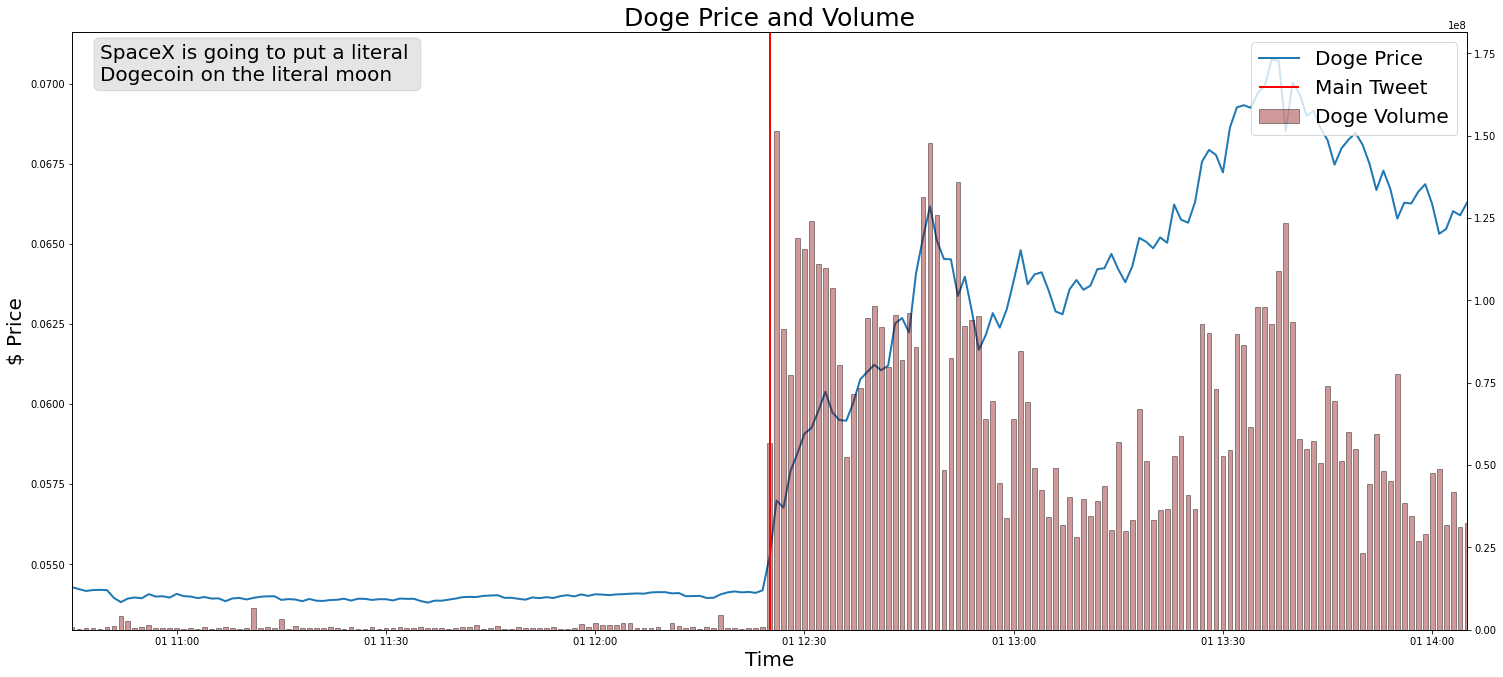

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


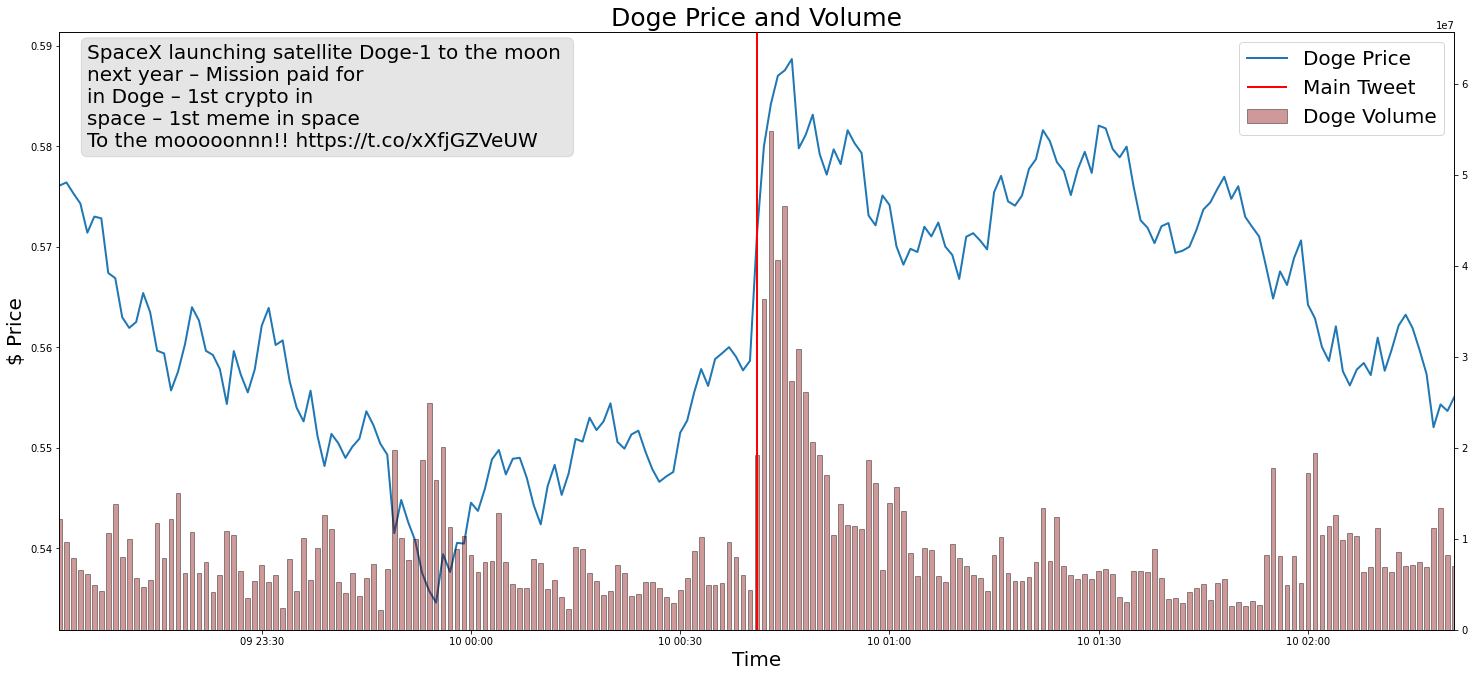

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


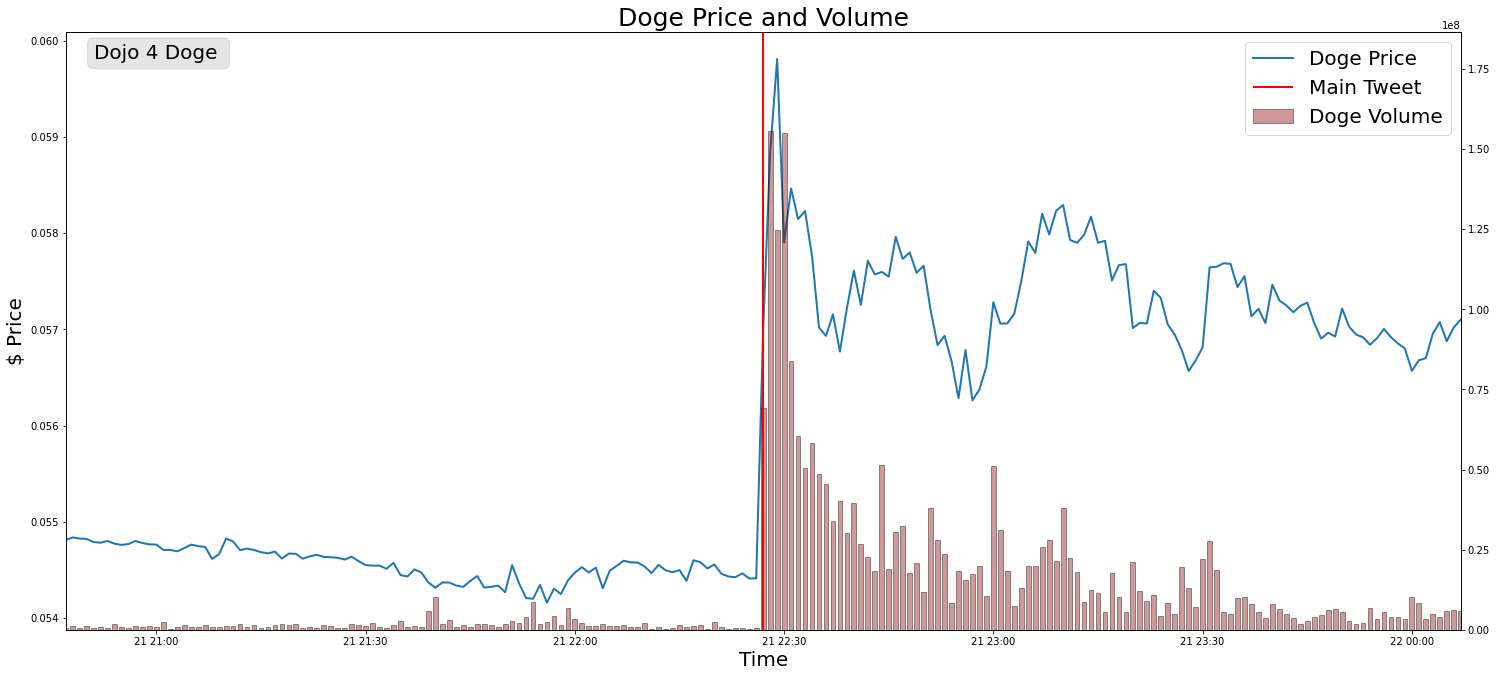

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value
C:\Users\ckopp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


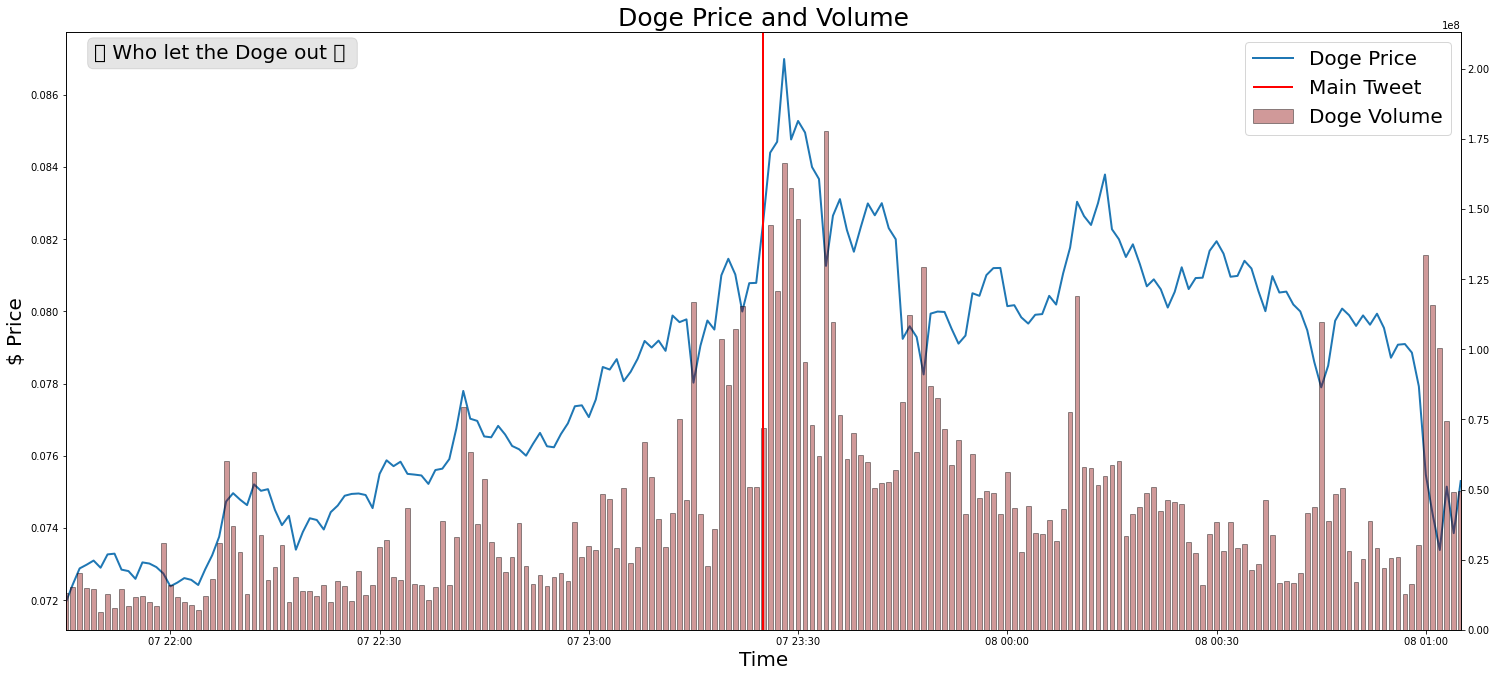

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


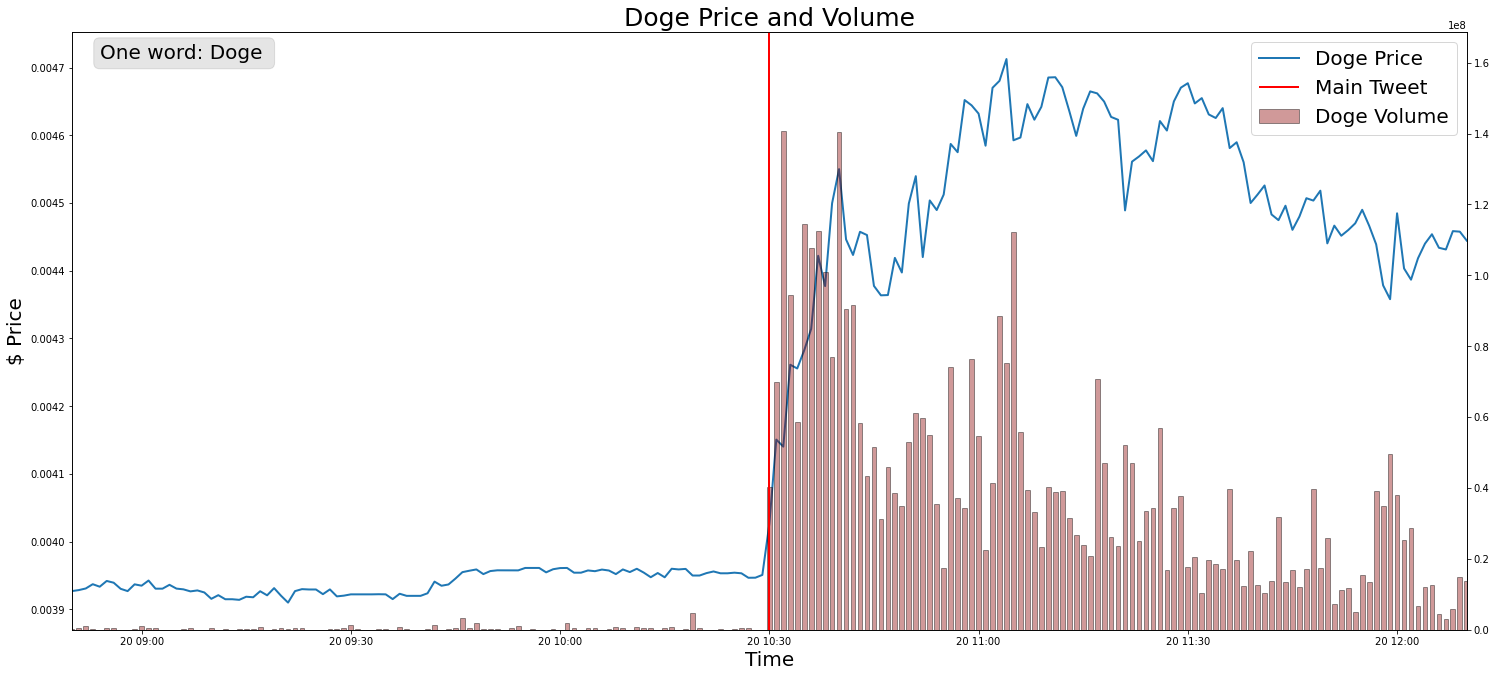

In [47]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-100*60) & (df['timestamp'] <= timestamp+100*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    ax = fig.add_subplot(111)
    ax.plot(doge_sliced['Date'], doge_sliced['Close'], lw=2, label="Doge Price")

    ax2 = ax.twinx()
    ax2.bar(doge_sliced['Date'], doge_sliced['Volume'], label="Doge Volume", color='darkred', alpha=0.4, width=1/(35*60), edgecolor='black')
    ax2.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        ax2.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='orange', lw=2) 
   
    ax2.set_ylim(0, doge_sliced['Volume'].max()*1.2)
    ax.set_xlim(min(doge_sliced['Date']), max(doge_sliced['Date']))
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("$ Price", size=20)

    t = [i + ' ' for i in tweet['Text'].split()]
    for i in range(7, len(t), 7):
        t.insert(i, '\n')
    anno = ''.join(t)

    ax.text(0.02, 0.98, anno, transform=ax.transAxes, bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.1}, fontsize = 20, va='top')
    

    li, la = ax.get_legend_handles_labels()
    li2, la2 = ax2.get_legend_handles_labels()
    plt.legend(li+li2, la+la2, loc='best', fontsize = 20)
    # plt.legend(loc='best', fontsize=20)
    plt.title('Doge Price and Volume', size=25)

    plt.show()

    #print(tweet['Text'])

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.0012549249097938515
T[0; 1] =  1.5971476442666321
T[0; 5] =  0.7398151707847866
T[0; 10] =  0.9971453259788051
T[0; 30] =  0.5393394821616012
T[0; 60] =  0.30464154000491117
T[0; 120] =  0.12046913919278623


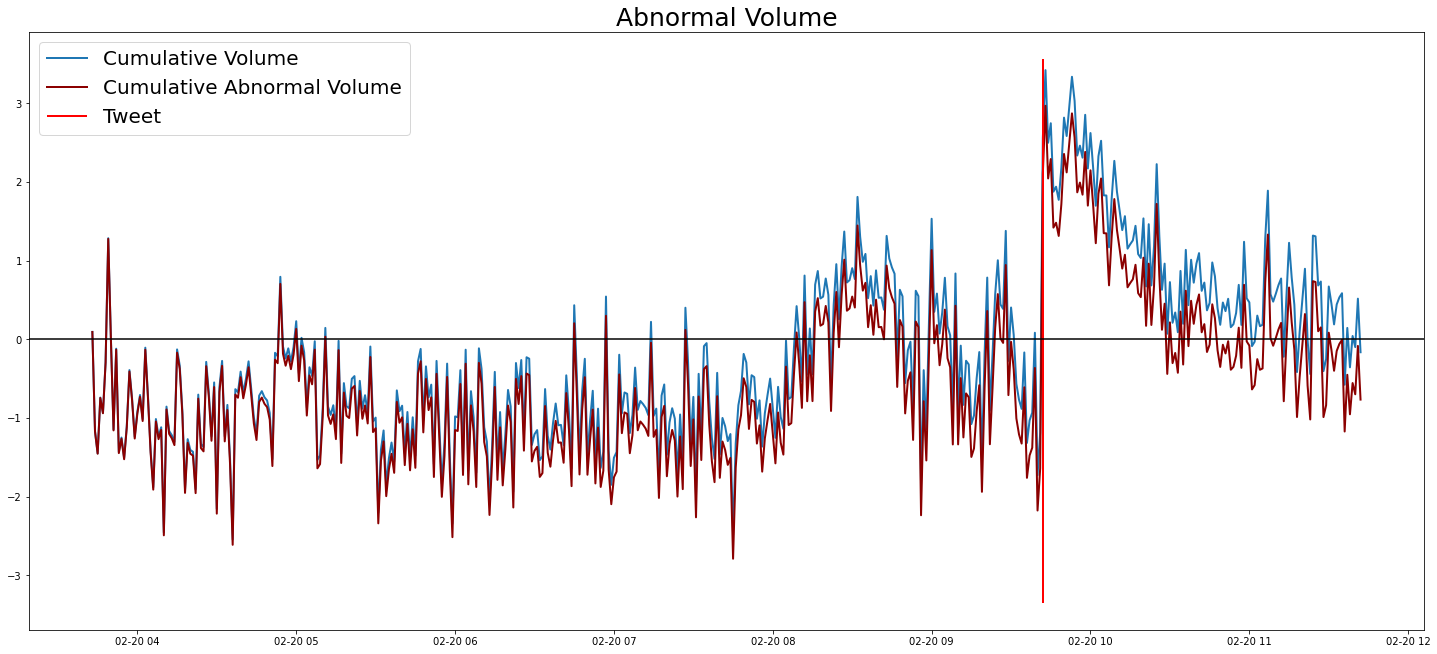

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.009088661256031338
T[0; 1] =  11.993874624578284
T[0; 5] =  0.13849928317924917
T[0; 10] =  -0.8631170652974239
T[0; 30] =  -0.049824525563426994
T[0; 60] =  -0.25486947037456836
T[0; 120] =  -0.17934449735631763


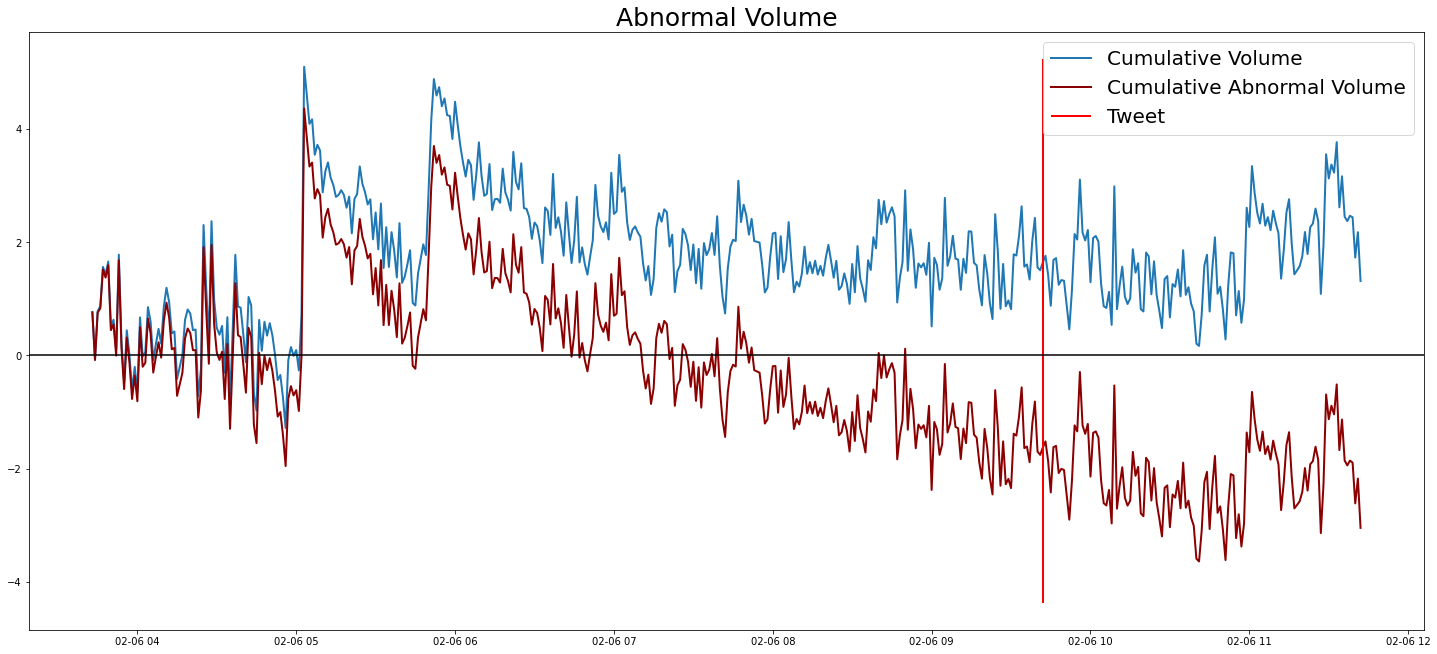

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.0010369321687267164
T[0; 1] =  3.4013021486634725
T[0; 5] =  0.4646547159739236
T[0; 10] =  0.3674334961818821
T[0; 30] =  0.06524333786504569
T[0; 60] =  0.12962123645659565
T[0; 120] =  0.051363722246111757


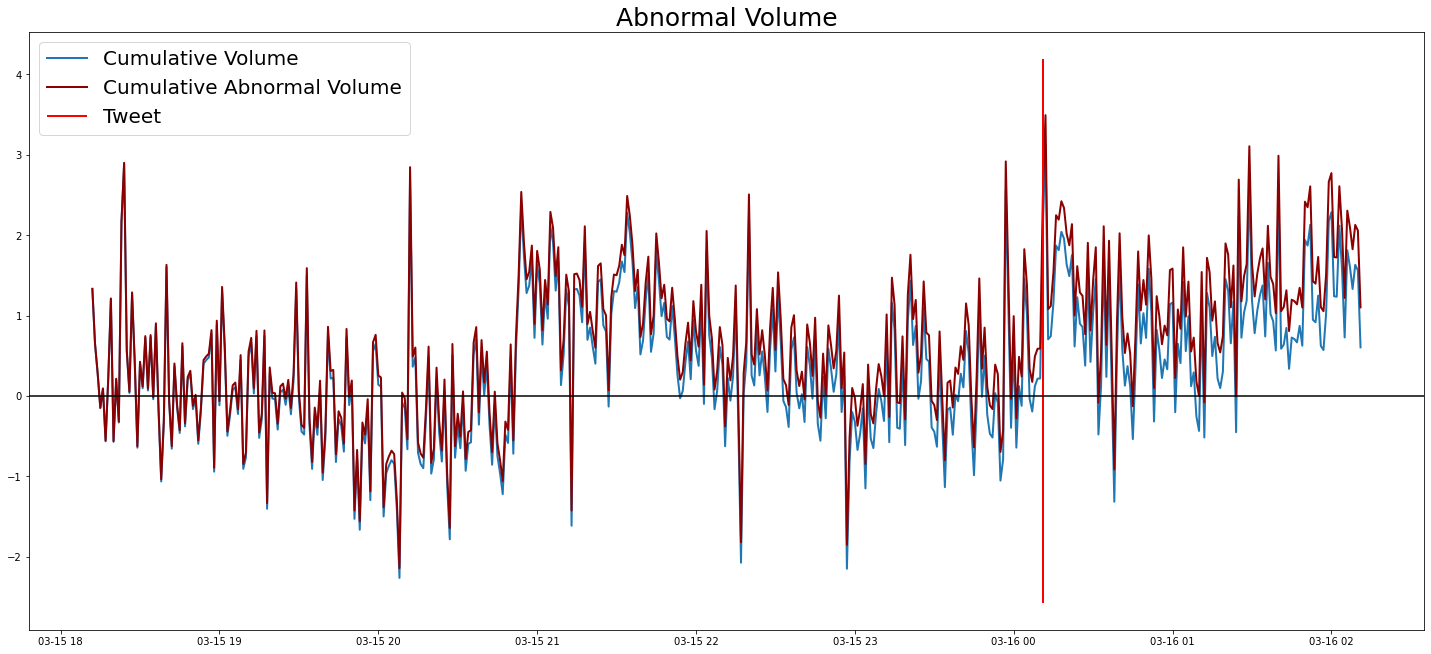

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.003509483346054713
T[0; 1] =  0.929586298420494
T[0; 5] =  0.7657048160022991
T[0; 10] =  0.4974744850150368
T[0; 30] =  0.10711330214913099
T[0; 60] =  0.05824354063252227
T[0; 120] =  0.0707298614547872


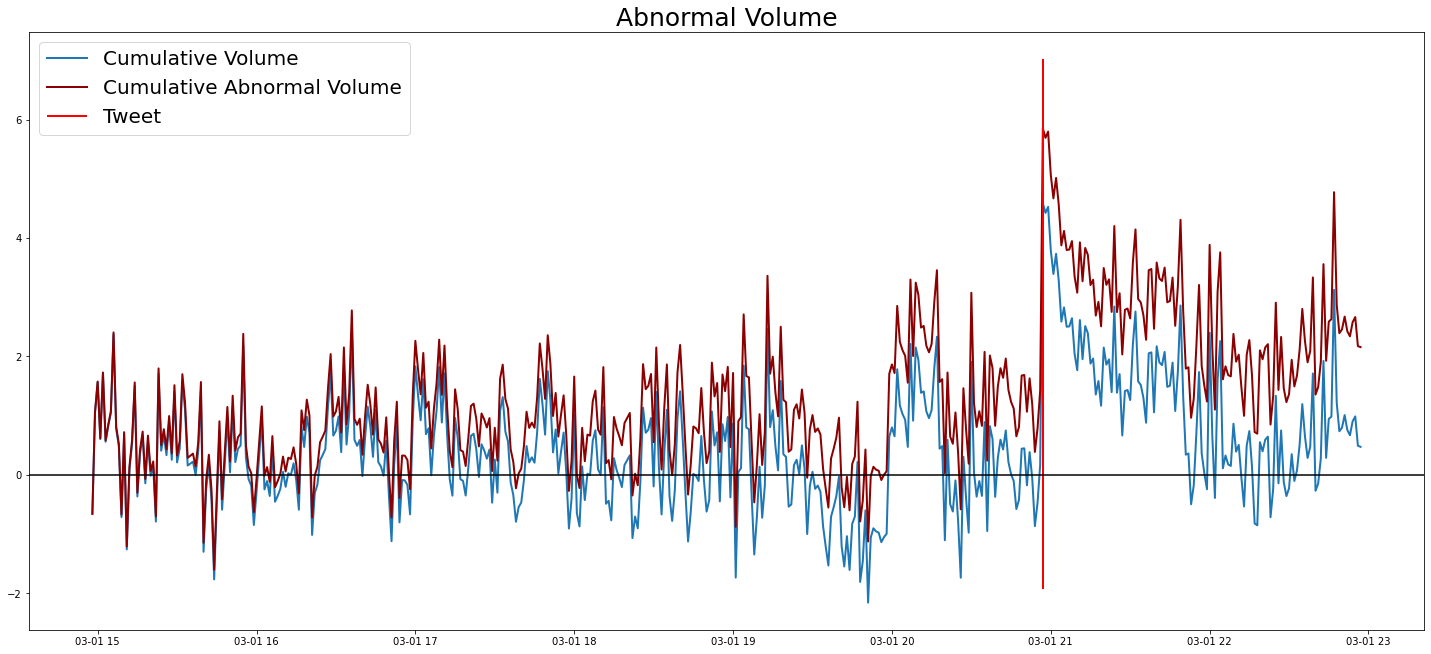

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -3.2173315796753715e-06
T[0; 1] =  0.3114294805923688
T[0; 5] =  0.03291243717408831
T[0; 10] =  -0.14734900482881833
T[0; 30] =  -0.09082144877078573
T[0; 60] =  -0.18788918062915322
T[0; 120] =  -0.021742995239046534


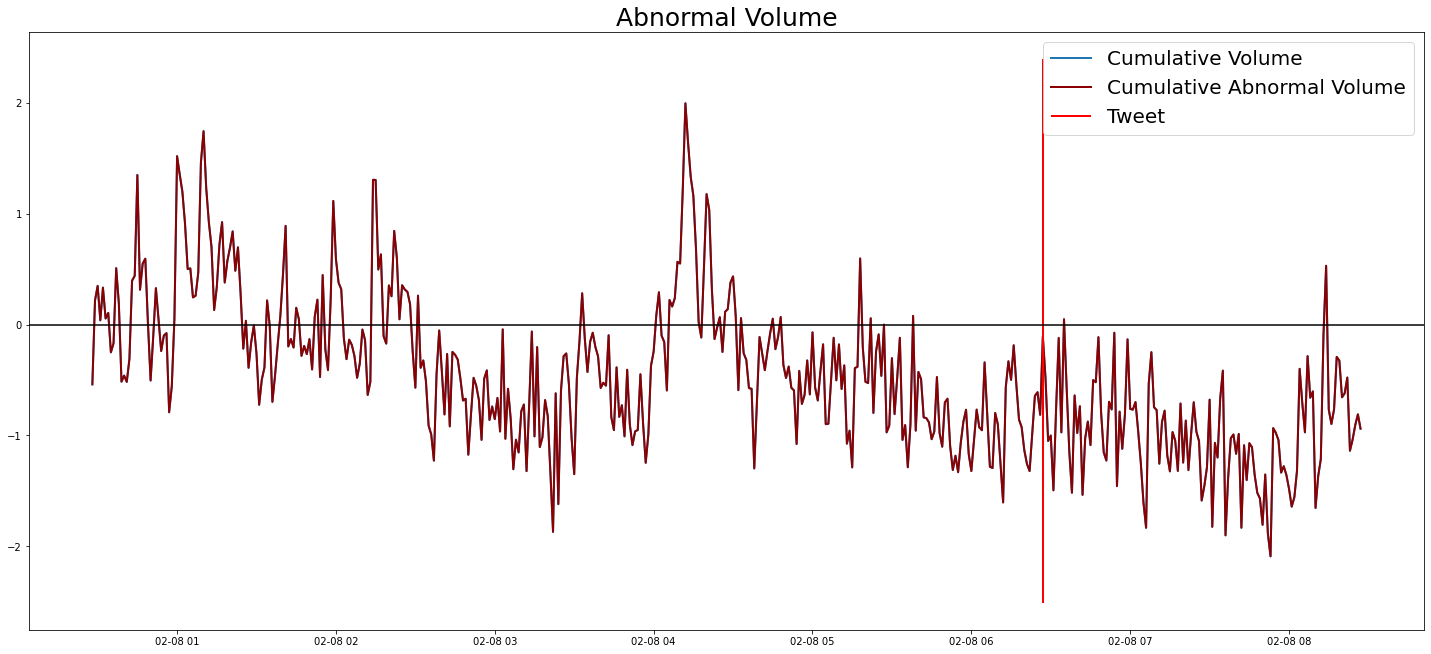

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.0008716186737857893
T[0; 1] =  5.190847664542584
T[0; 5] =  1.3585888254536402
T[0; 10] =  0.9919382474834315
T[0; 30] =  0.7915842498423276
T[0; 60] =  0.37837554519251865
T[0; 120] =  0.3144305319345414


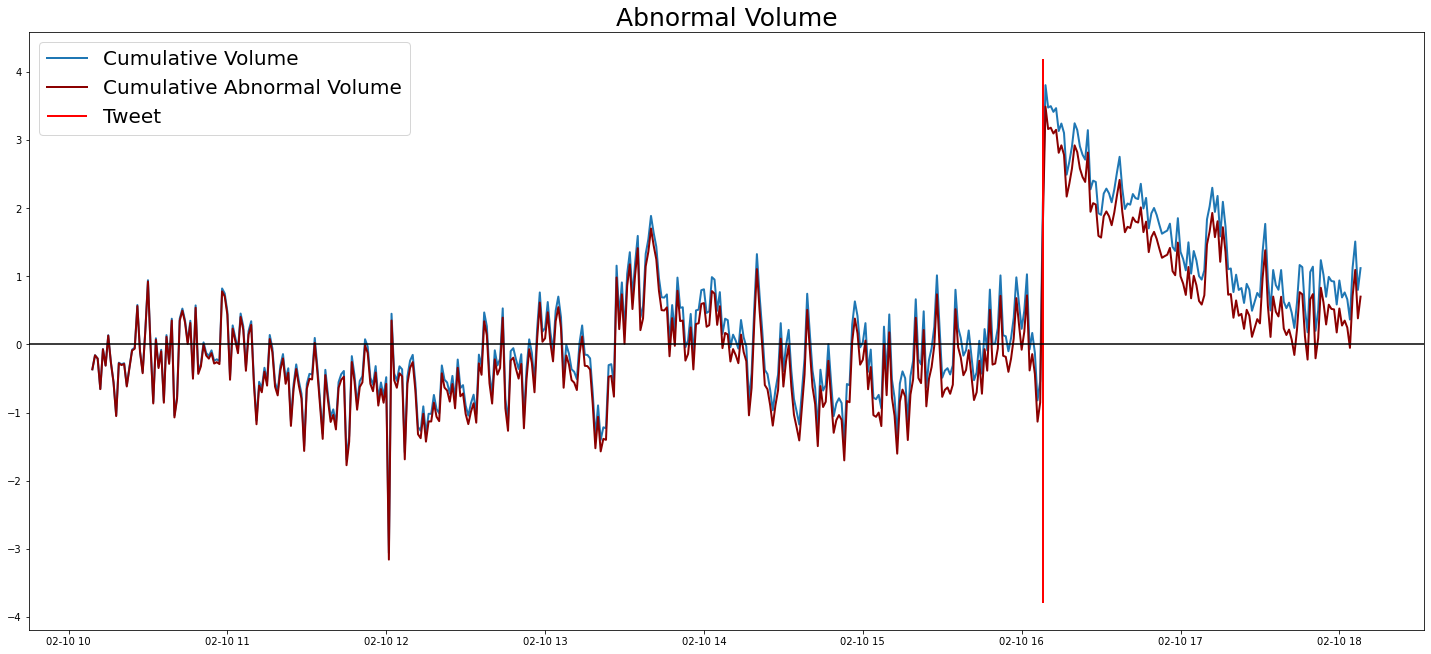

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.008720687582125242
T[0; 1] =  22.904049229047928
T[0; 5] =  1.8641284055005383
T[0; 10] =  1.9962141305394732
T[0; 30] =  1.2239889980122793
T[0; 60] =  0.827816967713563
T[0; 120] =  0.3758162808872642


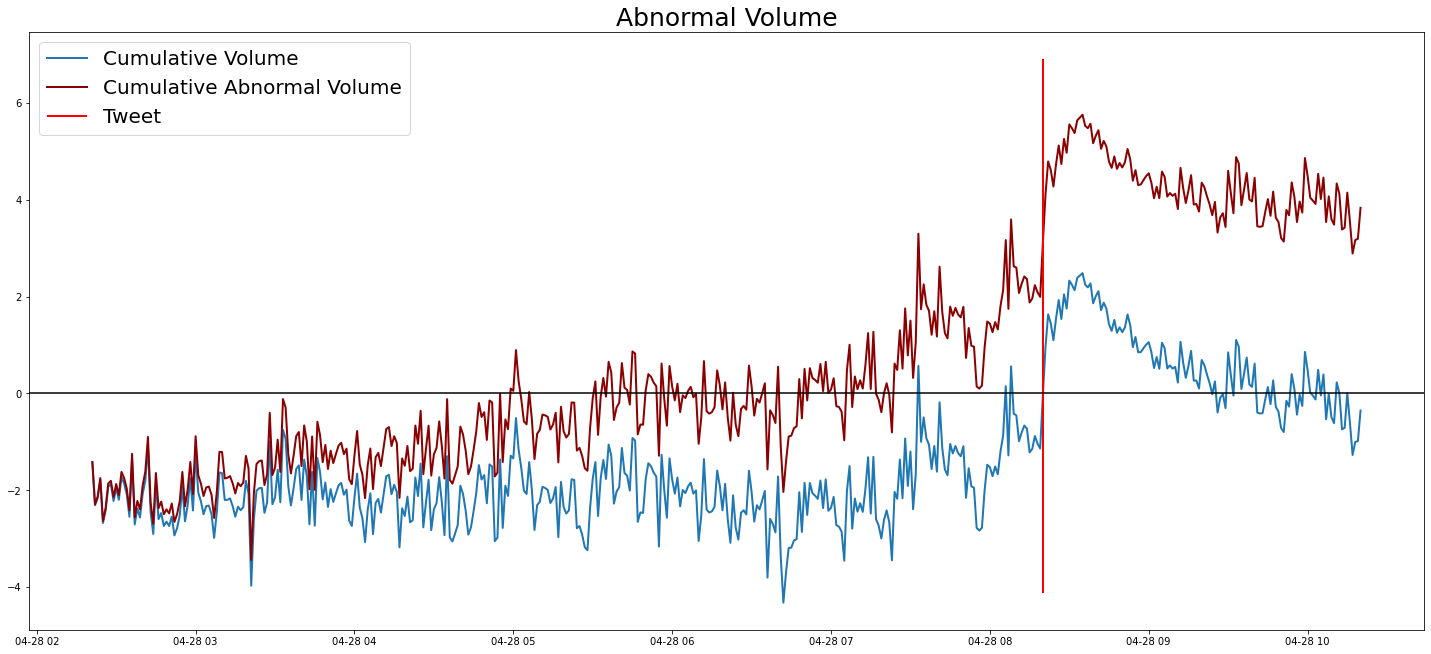

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.01507425051866842
T[0; 1] =  1.0348206342563813
T[0; 5] =  -0.02770143635078376
T[0; 10] =  -0.019041140502572614
T[0; 30] =  -0.013896644783133889
T[0; 60] =  -0.18859446551294998
T[0; 120] =  0.016235790262567034


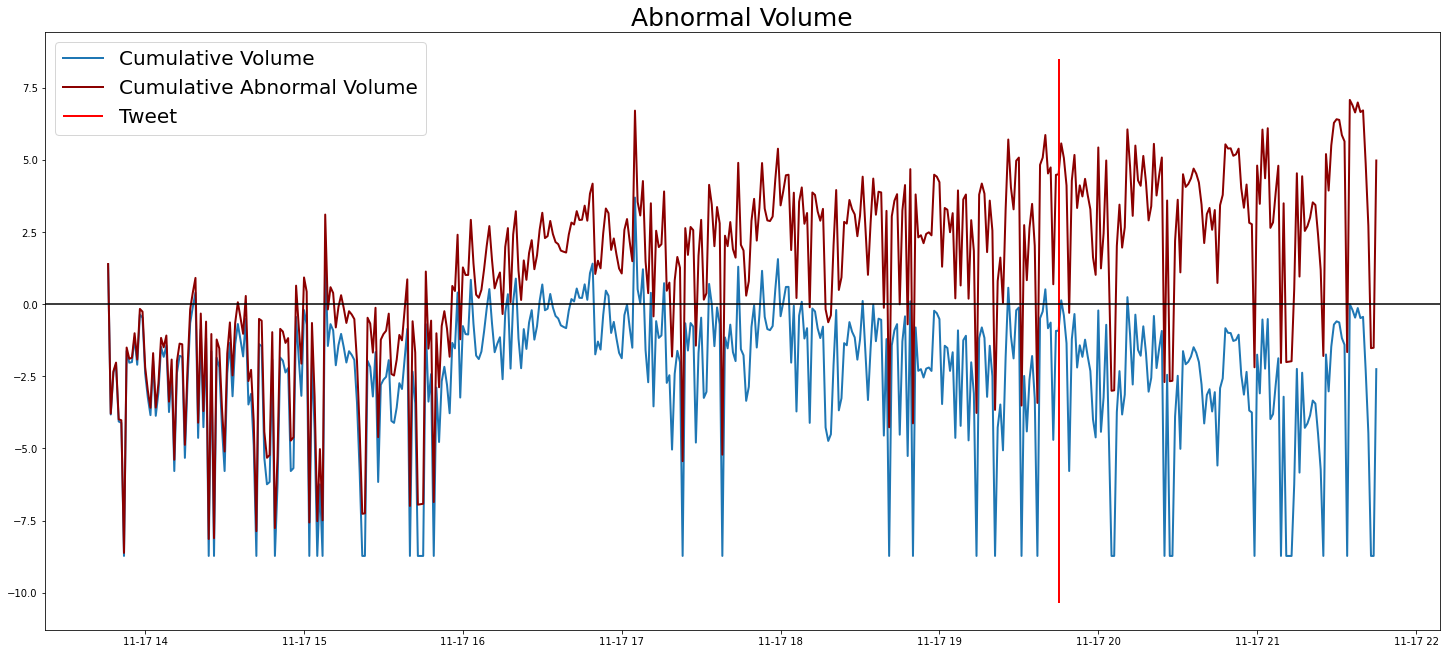

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.0004634854630033867
T[0; 1] =  1.6494549358430541
T[0; 5] =  1.415524782501978
T[0; 10] =  1.239704706385839
T[0; 30] =  0.686331602970396
T[0; 60] =  0.22825996263584167
T[0; 120] =  0.19272927621389796


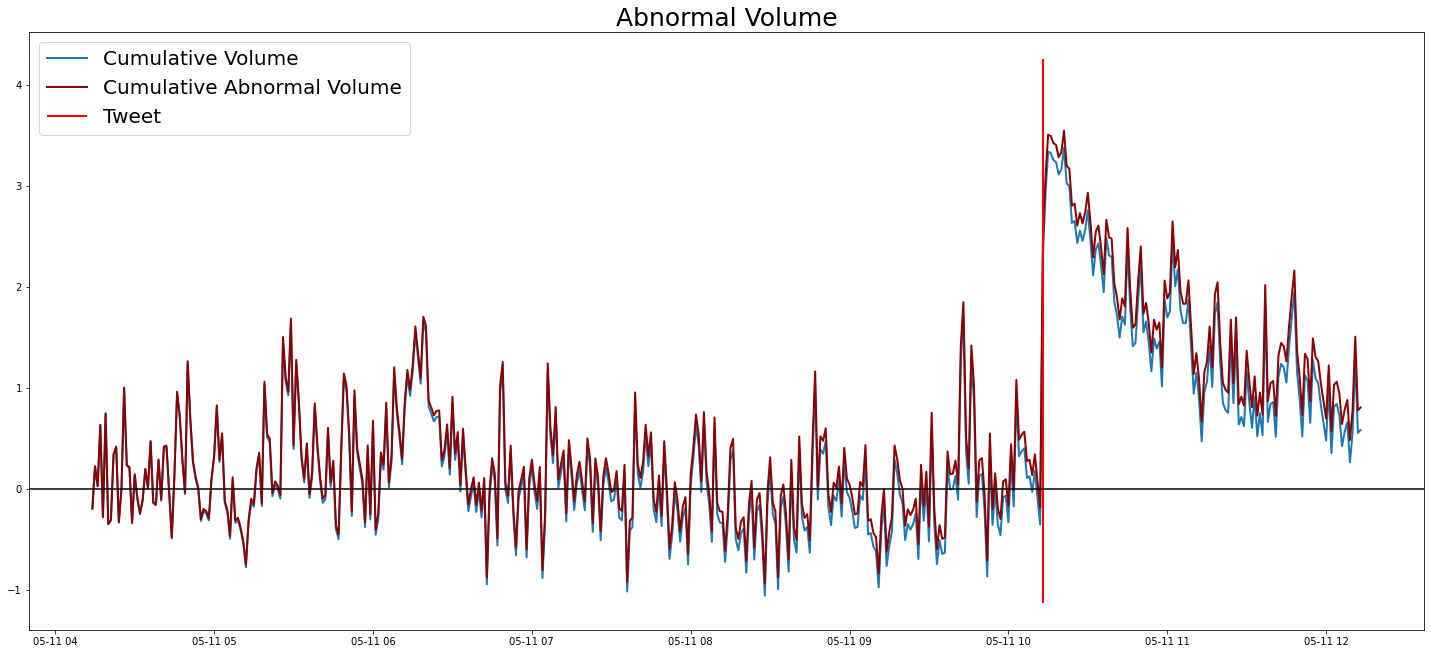

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.005487690108312506
T[0; 1] =  0.37571275431984613
T[0; 5] =  0.2388078145894515
T[0; 10] =  -0.4970856671280662
T[0; 30] =  -0.03842885253661714
T[0; 60] =  -0.2115200813036531
T[0; 120] =  -0.1836189049287607


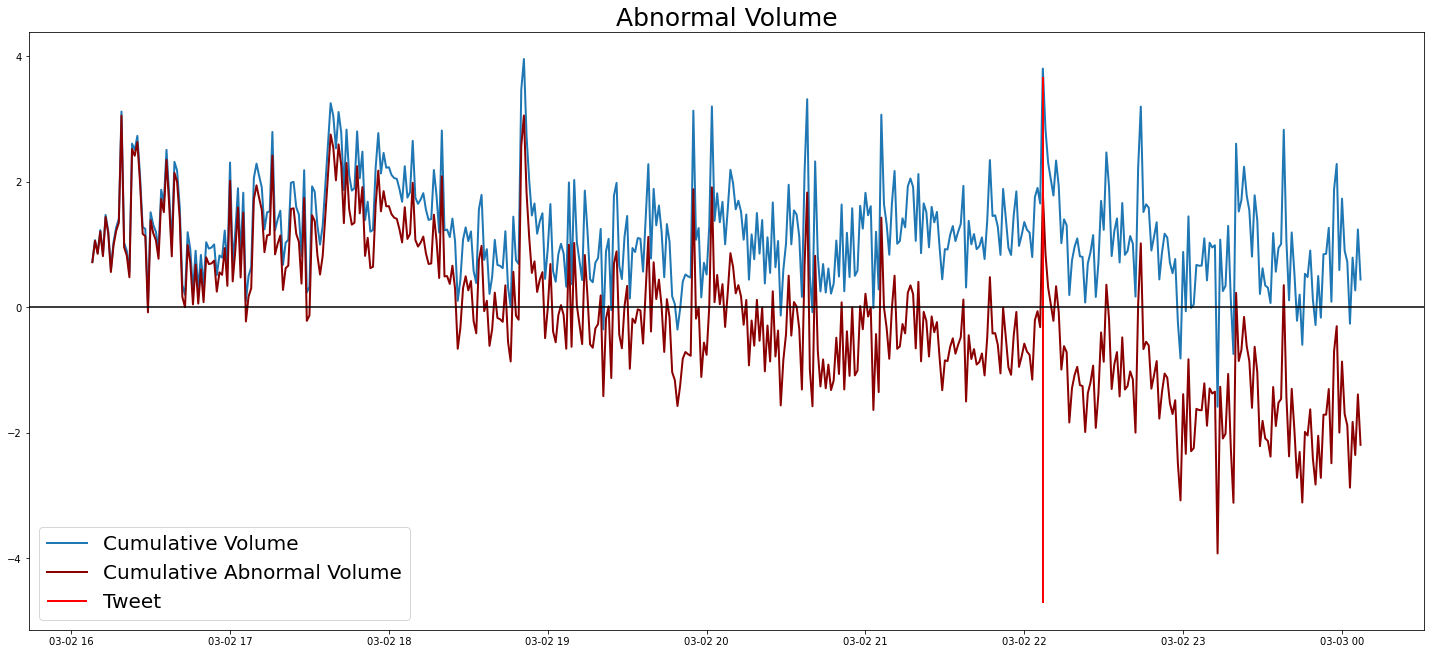

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.005014908767238316
T[0; 1] =  1.6790511716304821
T[0; 5] =  0.34389579007085597
T[0; 10] =  0.14337031598595806
T[0; 30] =  0.11275600803855561
T[0; 60] =  0.09975871396273407
T[0; 120] =  0.053468497179490336


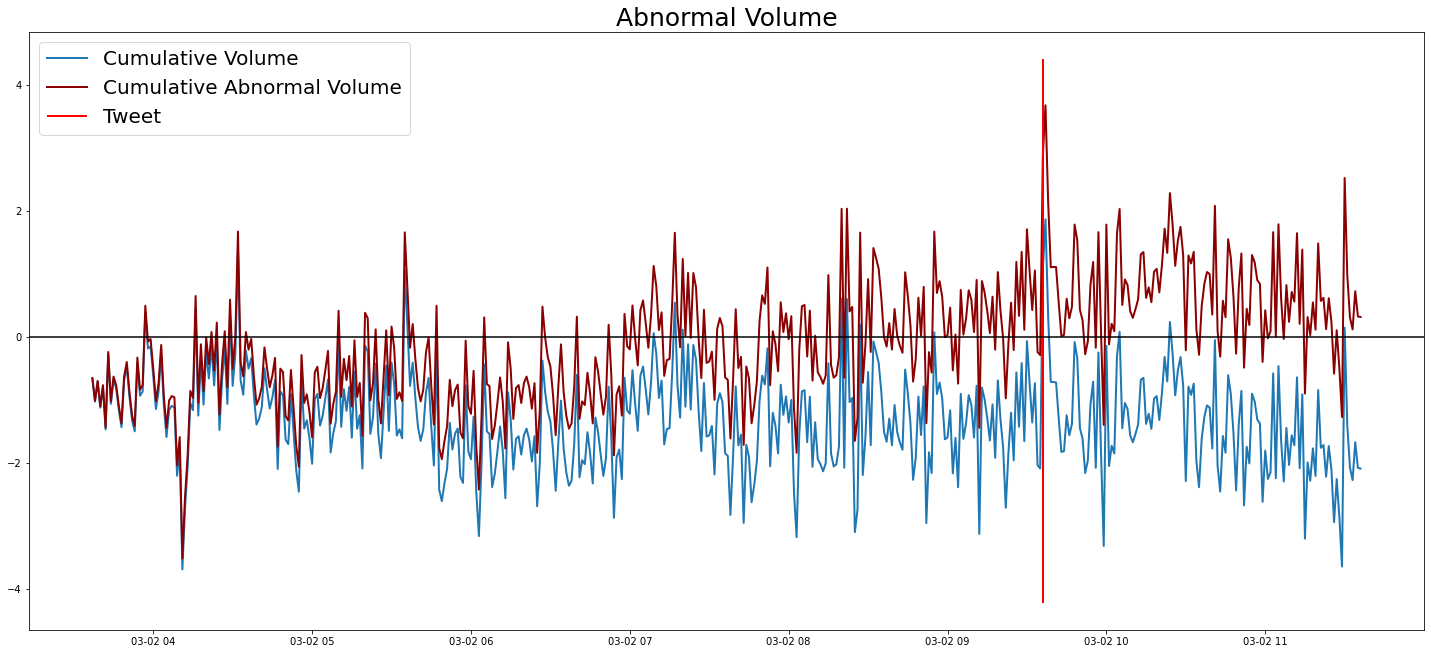

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.002253574333017324
T[0; 1] =  1.1671765045285216
T[0; 5] =  0.9445659006869405
T[0; 10] =  0.7130814186611446
T[0; 30] =  0.6579595286999367
T[0; 60] =  0.4036409846652328
T[0; 120] =  0.20219017163137096


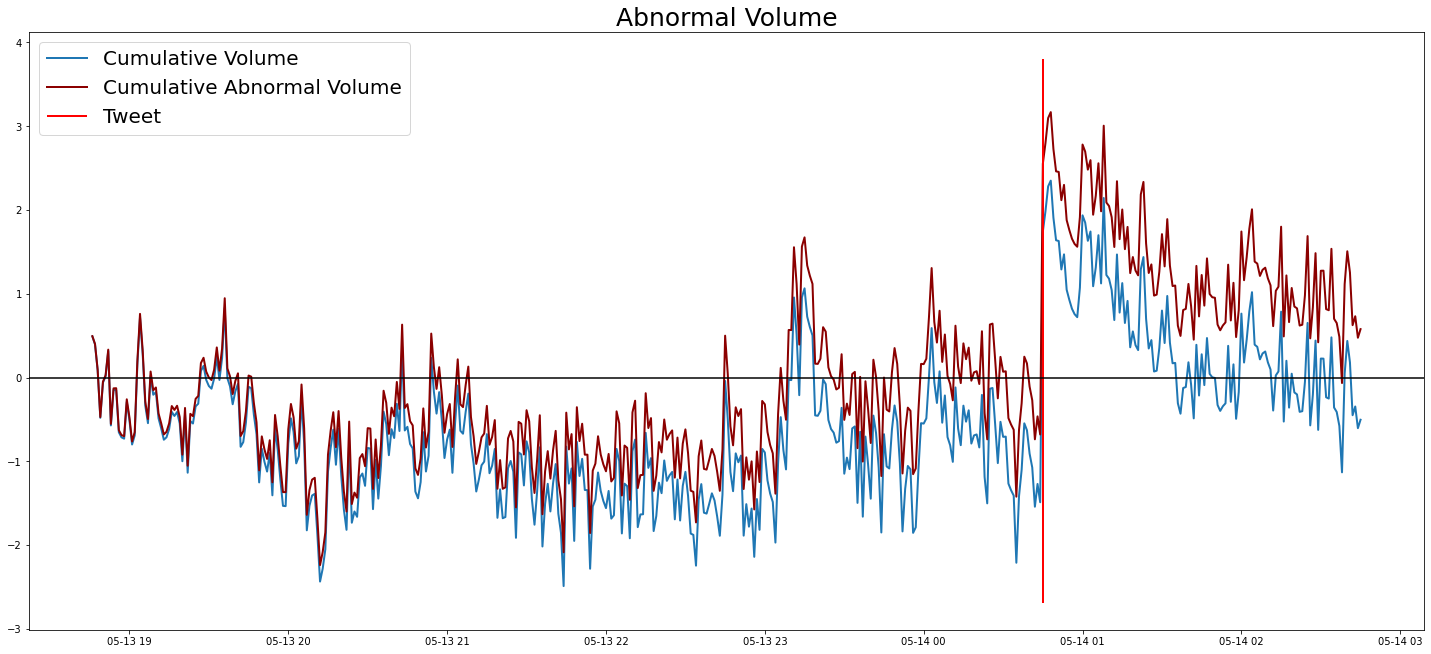

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.0006444576231652932
T[0; 1] =  0.7181399211233859
T[0; 5] =  0.3312945510712406
T[0; 10] =  0.3462828771162652
T[0; 30] =  0.23092198224710844
T[0; 60] =  0.12545703118536694
T[0; 120] =  0.09482689667582583


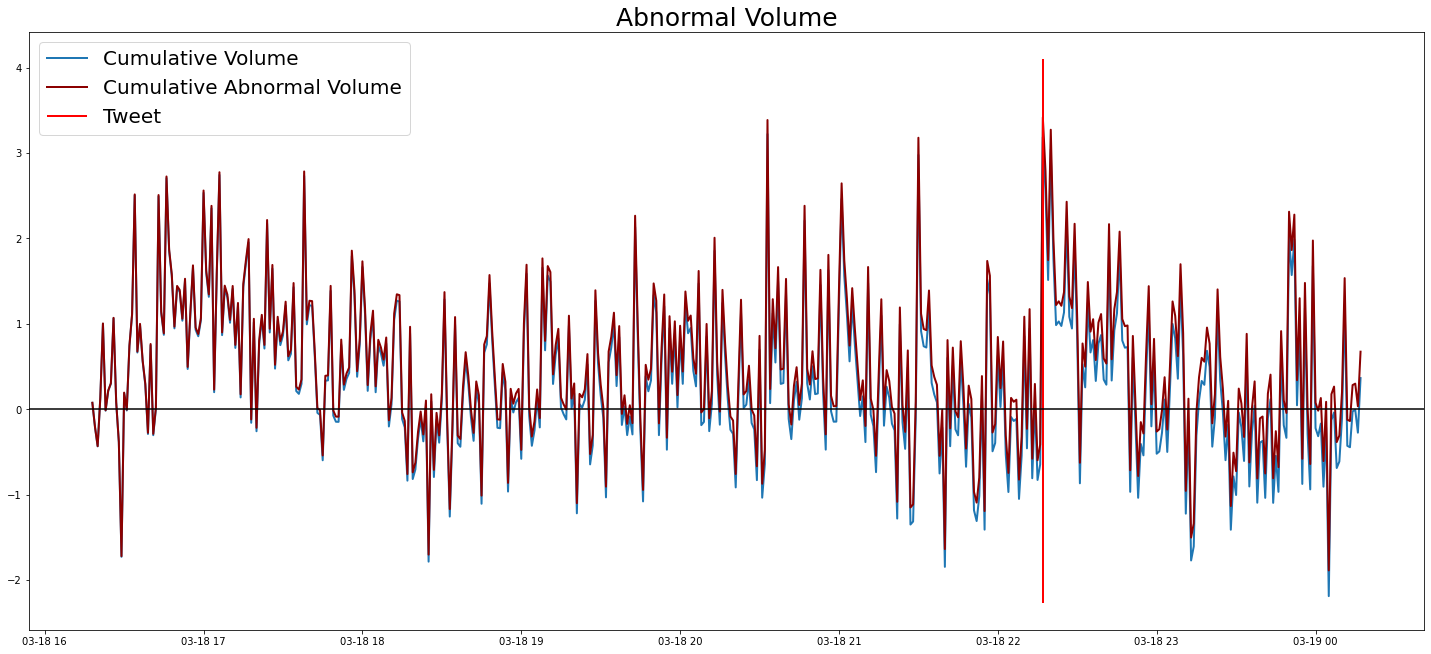

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.0005108439620144389
T[0; 1] =  3.8714388983303825
T[0; 5] =  -0.3037862515343364
T[0; 10] =  -0.3727717089016828
T[0; 30] =  -0.22916428684321993
T[0; 60] =  -0.10168317763646746
T[0; 120] =  -0.047558373711423546


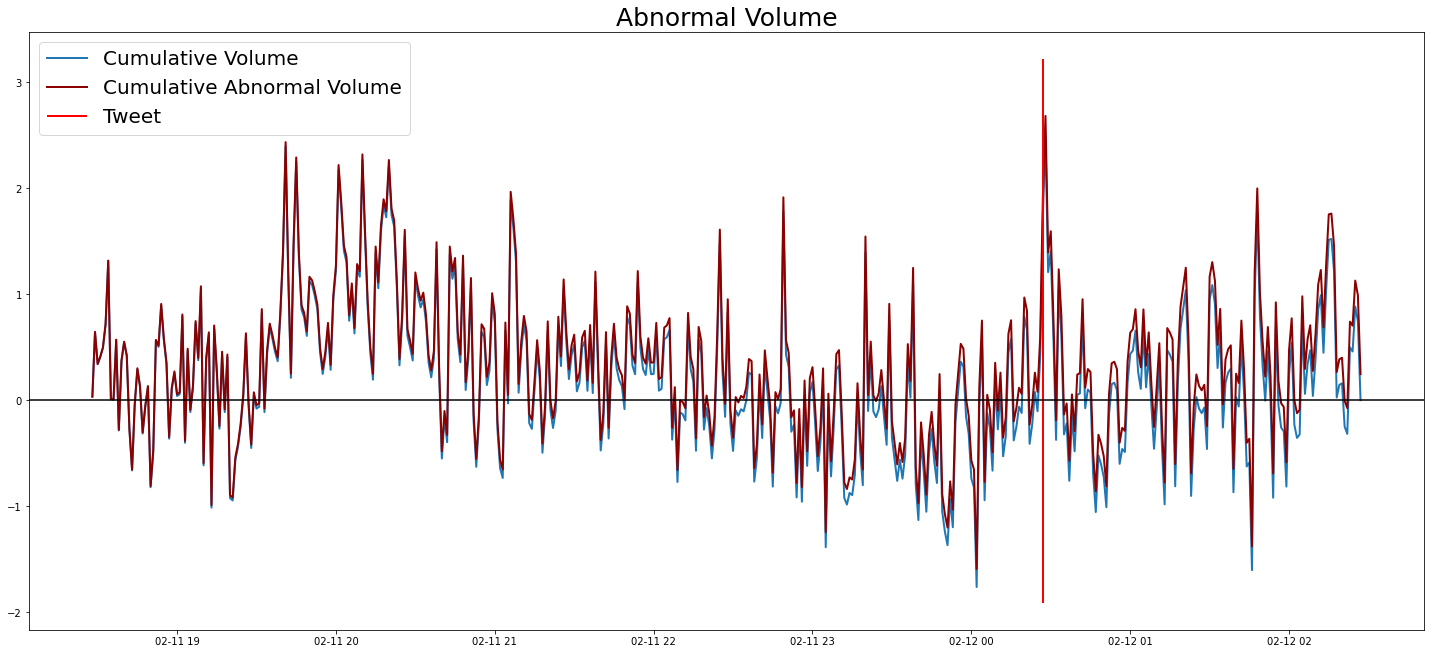

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.00336528787573982
T[0; 1] =  1.6257944496457266
T[0; 5] =  1.1711120974930334
T[0; 10] =  1.0555217313690703
T[0; 30] =  1.0247300509516093
T[0; 60] =  0.7608178746971829
T[0; 120] =  0.49919579570445255


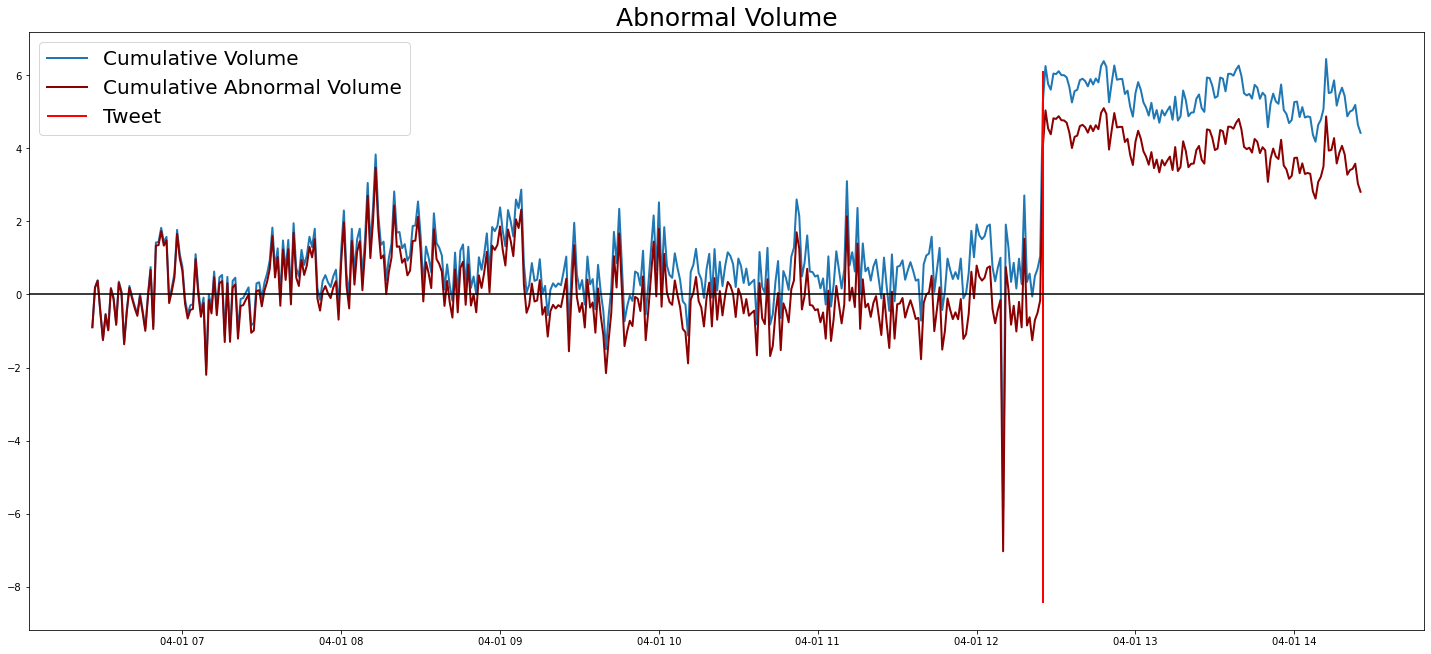

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -2.917689599973109e-05
T[0; 1] =  2.5658812802226456
T[0; 5] =  1.0577085683576375
T[0; 10] =  0.741012539282459
T[0; 30] =  0.18692789039335553
T[0; 60] =  -0.06158531623251162
T[0; 120] =  0.03500742688948128


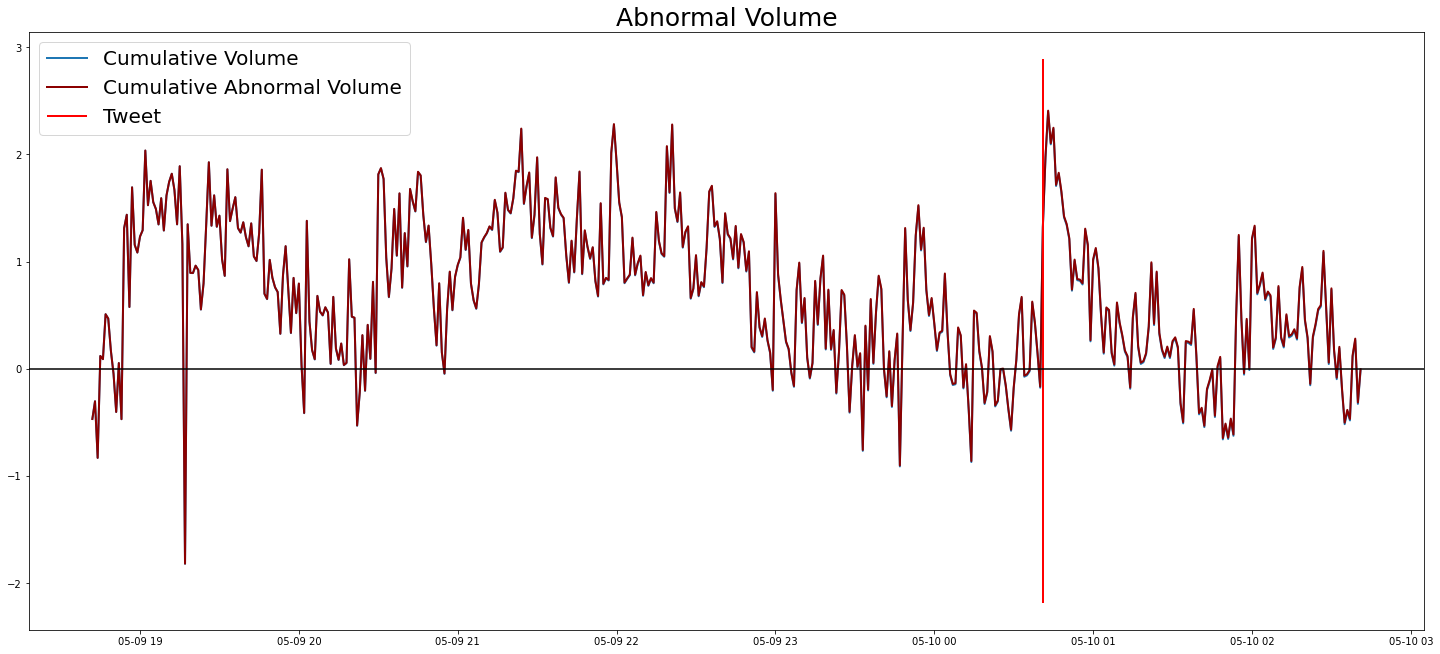

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.004108243376031387
T[0; 1] =  1.413585446334428
T[0; 5] =  0.95311611111
T[0; 10] =  0.8323309044455668
T[0; 30] =  0.6424971073134192
T[0; 60] =  0.5745974975084484
T[0; 120] =  0.36662035971650475


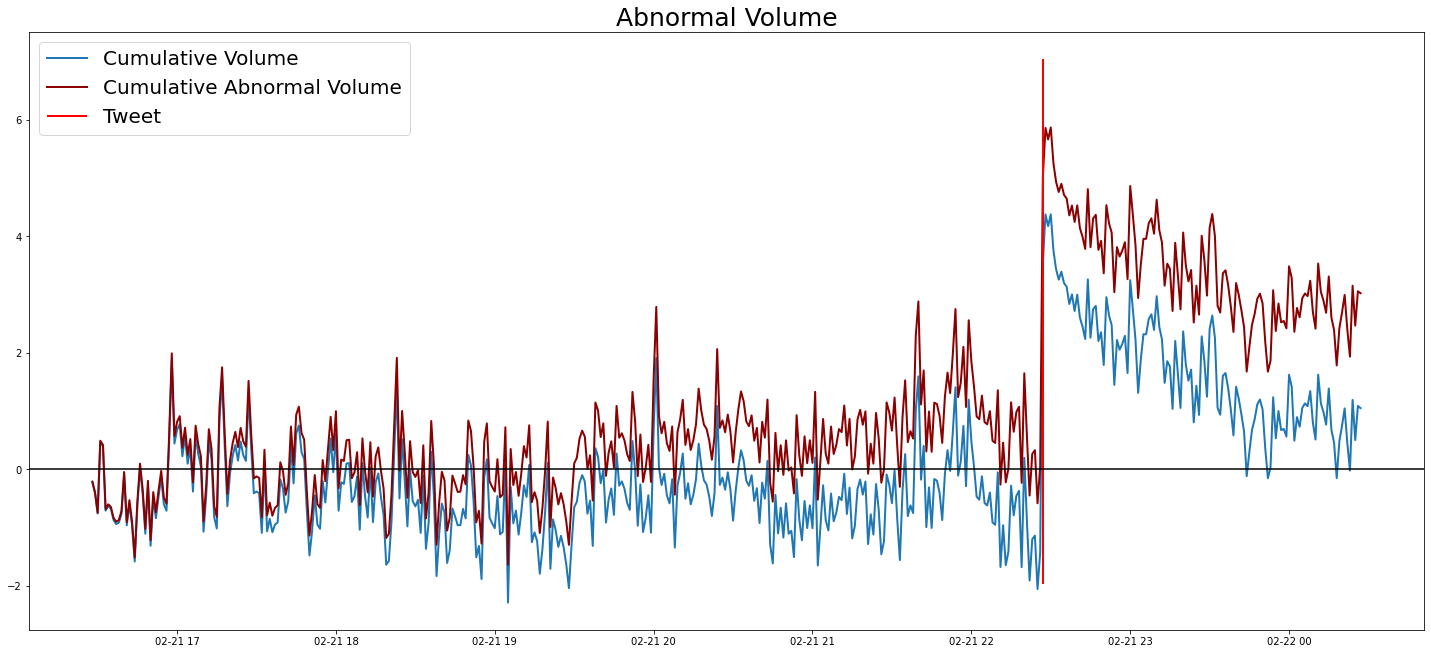

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  -0.0018695284350129144
T[0; 1] =  2.8952268103089547
T[0; 5] =  1.302503548689907
T[0; 10] =  0.5057361887044076
T[0; 30] =  0.12164188641711395
T[0; 60] =  -0.006068552836349828
T[0; 120] =  -0.13715976115986092


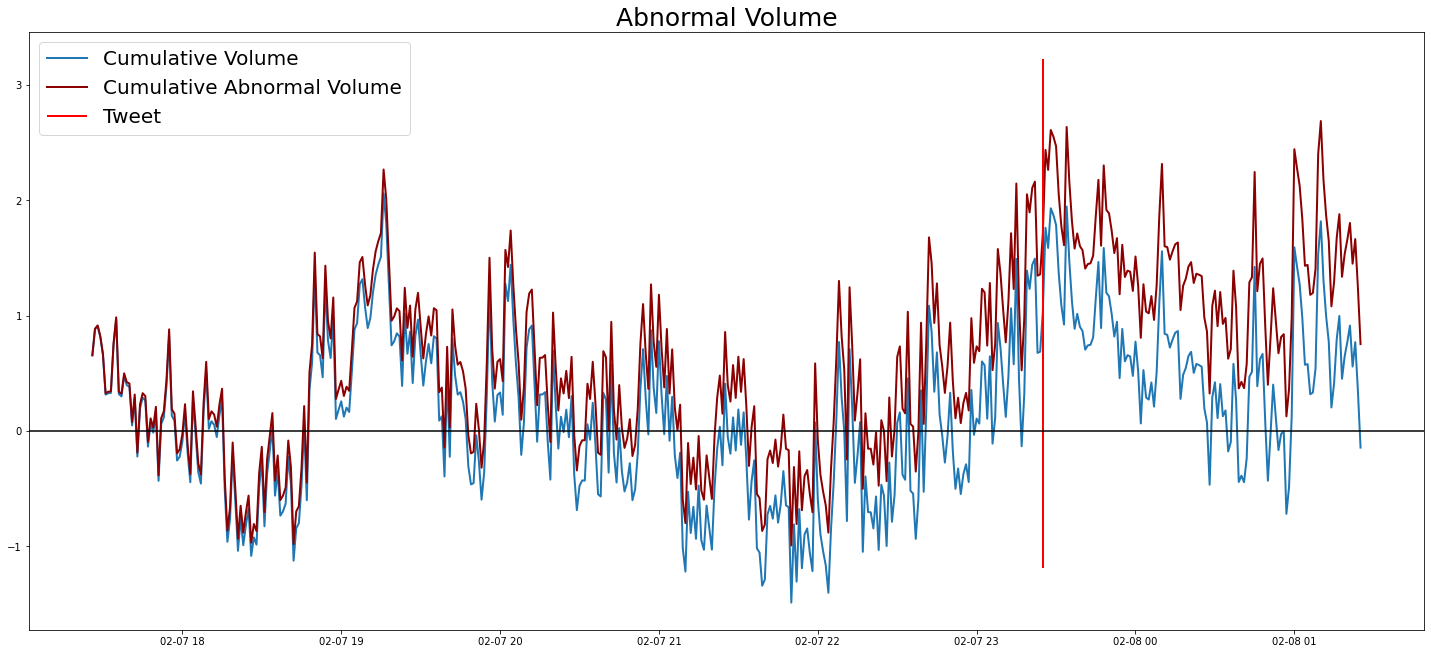

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\3964933627.py:29: SettingWithCopyWarning: 
A value 

Expected Volume =  0.0021286121443255634
T[0; 1] =  1.159813233377356
T[0; 5] =  1.1596234937980001
T[0; 10] =  1.175477264252123
T[0; 30] =  0.9917130137556487
T[0; 60] =  0.79326442908173
T[0; 120] =  0.6099045759176102


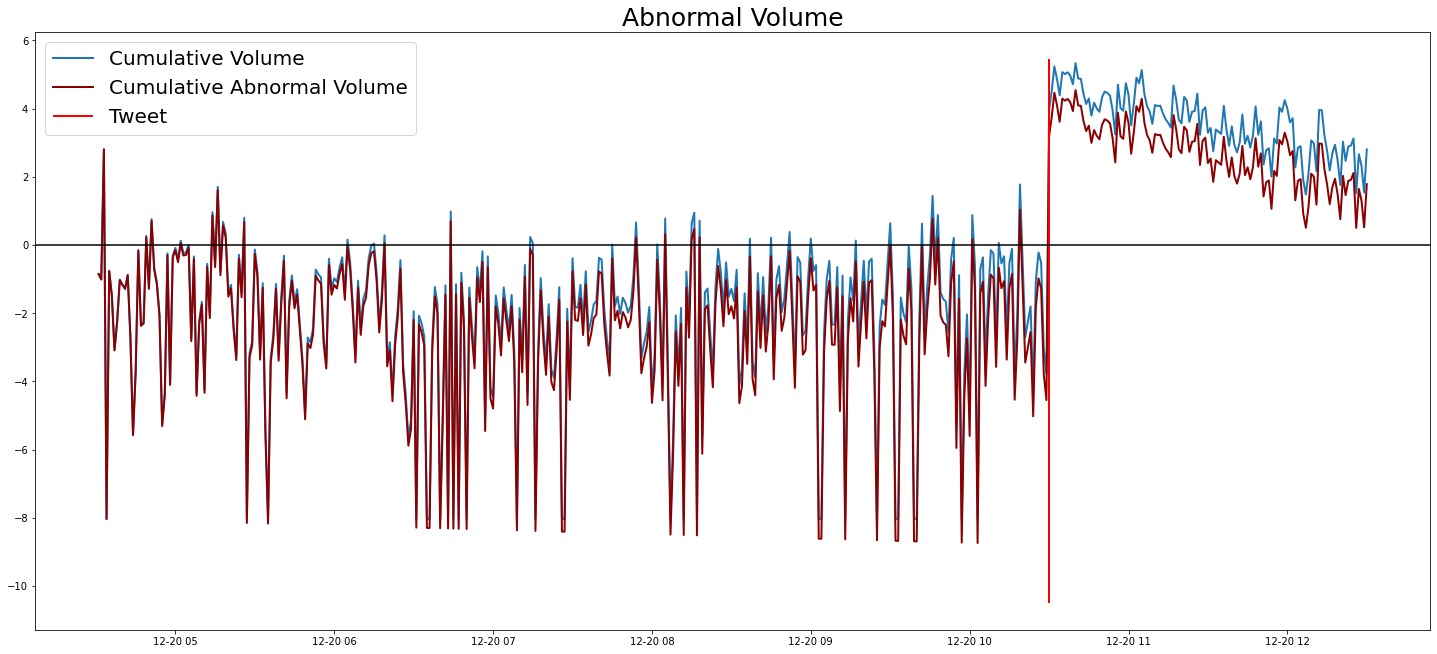

atv_frame:
       ATV_0     ATV_1     ATV_2     ATV_3     ATV_4     ATV_5     ATV_6  \
0   3.749563  0.862116 -0.924968  0.246657 -0.871983  0.062367 -0.167942   
1   0.128998  0.109142 -0.347603 -0.554631  0.800729  0.022087 -0.479552   
2   1.878279  1.024769 -2.412622  0.040064  0.418357  0.709982 -0.055601   
3   4.422437 -0.161382  0.106387 -0.729299 -0.398475  0.344947 -0.448875   
4   0.708232  -0.37186 -0.572885  0.049493 -0.494247  0.728903  0.645556   
5   2.588987  1.752595 -0.329544  0.019813 -0.084803  0.053574 -0.336937   
6   1.099412  1.007427  0.690496 -0.175471 -0.341194  0.464634  0.382635   
7   0.018329  1.071092 -0.508501 -0.952723 -4.413861  4.587069  0.888682   
8   2.627864  0.644162  0.419503 -0.013124 -0.069138 -0.020734 -0.121262   
9   2.144831 -0.973307 -0.538703 -0.261128 -0.270844  0.551178 -0.409704   
10  3.162307  0.801541 -1.523535 -1.046355  0.003807 -0.001675 -0.567495   
11   3.23107  0.249245  0.296953  0.071188 -0.440955 -0.266306 -0.006719   
1

In [72]:
# Volume
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))


atv_ges = pd.DataFrame(columns=['ATV_0', 'ATV_1', 'ATV_2', 'ATV_3', 'ATV_4', 'ATV_5', 'ATV_6', 'ATV_7', 'ATV_8', 'ATV_9', 'ATV_10'])
catv_ges = pd.DataFrame(columns = ['CATV_1', 'CATV_2', 'CATV_5', 'CATV_10', 'CATV_30', 'CATV_60', 'CATV_120'])

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    # Es werden nach Tweets gesucht, die 240 Minuten vor und 100 Minuten nach dem Event stattgefunden haben.
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-240*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    # Ausrechnen der Renditen
    doge_sliced["log_vol"] = np.log((doge_sliced['Quote Asset Volume']+1) / (doge_sliced['Quote Asset Volume'].shift(1)+1))
    
    ###################################################################################################################
    # Kumulierte Renditen
    doge_sliced['cum_log_vol'] = np.cumsum(doge_sliced['log_vol'])
    ###################################################################################################################


    # Expected Volume which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_volume = np.mean(doge_sliced['log_vol'].iloc[:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300? --> Upper bound excluded
    print('Expected Volume = ', expected_volume)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_volume'] = doge_sliced['log_vol'] - expected_volume
    doge_sliced['abnormal_volume_cum'] = np.cumsum(doge_sliced['abnormal_volume'])


    atv_values = []
    for event_horizon in range(11):
        atv_values.append(doge_sliced['abnormal_volume'].iloc[360+event_horizon])
    atv_ges = pd.concat([atv_ges, pd.DataFrame([atv_values], columns=atv_ges.columns)], ignore_index=True)


    catv_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        catv_values.append(doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].sum())
    catv_ges = pd.concat([catv_ges, pd.DataFrame([catv_values], columns=catv_ges.columns)], ignore_index=True)

    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', (doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].mean() / doge_sliced['abnormal_volume'].iloc[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1)) # <-- richtiger Wert
        
    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['cum_log_vol'], lw=2, label='Cumulative Volume')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_volume_cum'], lw=2, label='Cumulative Abnormal Volume', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Tweet', ymin=doge_sliced['abnormal_volume_cum'].min()*1.2, ymax=doge_sliced['abnormal_volume_cum'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_volume_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Abnormal Volume', size=25)

    plt.show()

print('atv_frame:')
print(atv_ges)

print('catv_frame:')
print(catv_ges)

In [105]:
# Market Model
ar_ges_market = pd.DataFrame(columns=['AR_0', 'AR_1', 'AR_2', 'AR_3', 'AR_4', 'AR_5', 'AR_6', 'AR_7', 'AR_8', 'AR_9', 'AR_10', ])
car_ges_market = pd.DataFrame(columns = ['CAR_1', 'CAR_2', 'CAR_5', 'CAR_10', 'CAR_30', 'CAR_60', 'CAR_120'])


for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    btc_sliced = df_btc[(df_btc['timestamp'] >= timestamp-360*60) & (df_btc['timestamp'] <= timestamp+120*60)]

    # Ausrechnen der Renditen
    # doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
    doge_returns = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1)).values

    # btc_sliced['log_returns'] = np.log(btc_sliced['Close'] / btc_sliced['Close'].shift(1))
    btc_returns = np.log(btc_sliced['Close'] / btc_sliced['Close'].shift(1)).values

    # doge_sliced['log_returns'].iloc[0] = 0
    doge_returns[0] = 0

    # btc_sliced['log_returns'].iloc[0] = 0
    btc_returns[0] = 0

    doge_estimation = doge_returns[1:301]
    btc_estimation = btc_returns[1:301]

    x = btc_estimation.reshape(-1, 1)
    y = doge_estimation.reshape(-1, 1)

    #perform linear Regression
    model = LinearRegression().fit(x, y)

    alpha = model.intercept_
    beta = model.coef_[0]

    # print('################################')
    # print(tweet['Text'])
    # print("Intercept:", model.intercept_)
    # print("Coefficients:", model.coef_[0])
    # print('################################')

    doge_abnormal_returns = doge_returns - (alpha + beta * btc_returns)

    ar_values = []
    for event_horizon in range(11):
        ar_values.append(doge_abnormal_returns[360+event_horizon])
    ar_ges_market = pd.concat([ar_ges_market, pd.DataFrame([ar_values], columns=ar_ges_market.columns)], ignore_index=True)


    car_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        car_values.append(doge_abnormal_returns[360:360+event_horizon+1].sum())
    car_ges_market = pd.concat([car_ges_market, pd.DataFrame([car_values], columns=car_ges_market.columns)], ignore_index=True)

    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', np.round((doge_abnormal_returns[360:360+event_horizon+1].mean() / doge_abnormal_returns[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1), 4)) # <-- richtiger Wert
    print('\n')
print(ar_ges_market)
print(car_ges_market)

T[0; 1] =  6.1819
T[0; 5] =  1.8216
T[0; 10] =  2.8497
T[0; 30] =  0.7701
T[0; 60] =  0.4973
T[0; 120] =  -0.1052


T[0; 1] =  -0.2388
T[0; 5] =  -1.3899
T[0; 10] =  -1.2079
T[0; 30] =  -1.2488
T[0; 60] =  -0.6973
T[0; 120] =  0.3292




T[0; 1] =  1.6889
T[0; 5] =  1.4114
T[0; 10] =  0.3954
T[0; 30] =  0.1777
T[0; 60] =  0.3883
T[0; 120] =  0.2216


T[0; 1] =  5.5406
T[0; 5] =  0.6853
T[0; 10] =  0.5397
T[0; 30] =  0.248
T[0; 60] =  0.3064
T[0; 120] =  0.5898


T[0; 1] =  -0.3602
T[0; 5] =  -0.3168
T[0; 10] =  -0.6611
T[0; 30] =  -0.7576
T[0; 60] =  -0.4267
T[0; 120] =  -0.6294


T[0; 1] =  6.2105
T[0; 5] =  1.5085
T[0; 10] =  1.5001
T[0; 30] =  0.9197
T[0; 60] =  0.7974
T[0; 120] =  0.6531


T[0; 1] =  3.5803
T[0; 5] =  2.8455
T[0; 10] =  3.7975
T[0; 30] =  1.3631
T[0; 60] =  0.9887
T[0; 120] =  1.0173


T[0; 1] =  -10.3304
T[0; 5] =  0.875
T[0; 10] =  0.6124
T[0; 30] =  1.3424
T[0; 60] =  1.4763
T[0; 120] =  1.1757


T[0; 1] =  8.3554
T[0; 5] =  5.0873
T[0; 10] =  3.0945
T[0; 30] =  1.4917
T[0; 60] =  1.0688
T[0; 120] =  0.8889


T[0; 1] =  0.5398
T[0; 5] =  -0.376
T[0; 10] =  -0.5743
T[0; 30] =  -0.6031
T[0; 60] =  0.0098
T[0; 120] =  -0.5521


T[0; 1] =  2.1532
T[0; 5] =  1.0222
T[0; 10] =  0.6214
T[0; 30] =  0.34

In [41]:
# log(x+1)
# 1. Schritt log(vol +1)
# 2. Schritt E(log(vol+1))
# 3. Schritt: log(vol+1) - E(log(vol+1))
# --> Abnormal Volume

In [42]:
a = [1, 2, 3, 4, 5]
print(a[0:3])

[1, 2, 3]


In [43]:
m = min(df_tweets['timestamp'])
min(df[df['timestamp'] > m]['Volume'])

0.0